In [1]:
import importlib
from IPython.core.magic import register_cell_magic
from IPython import get_ipython
# Conditional skipping of https://kioku-space.com/en/jupyter-skip-execution/
@register_cell_magic
def skip_if(line, cell):
    if eval(line):
        return
    get_ipython().run_cell(cell)

get_ipython().register_magic_function(skip_if, 'cell')

In [2]:
import mercury as mr
import nbformat

In [3]:
app = mr.App(
    title="CS 365: Transit Regina Data Wrangling", 
    description="Cleaning and transforming Transit Regina data for analysis", 
    show_code=False
)

mercury.App

  # CS 365 Final Project: Transit Regina Data Wrangling

 ## Janice Cotcher
 ## December 5, 2025

 **Data Source:** City of Regina Open Data Portal

 **Dataset:** Transit Stops and Routes (November 20, 2025)

 ## Dataset Source & License

  **Source:** [City of Regina Open Data Portal](https://open.regina.ca)
  - Bus Stop Locations (yqrStops.json)
  - Transit Routes (yqrRoutes.json)
  - General Transit Feed Specification(routes.txt, stops.txt, trips.txt, stop_times.txt)

  **License:** Open Government License - Regina
 - Allows educational and commercial use
 - No Personally Identifiable Information - only public infrastructure data

  **Why this matters:** Understanding transit accessibility and route coverage for urban planning

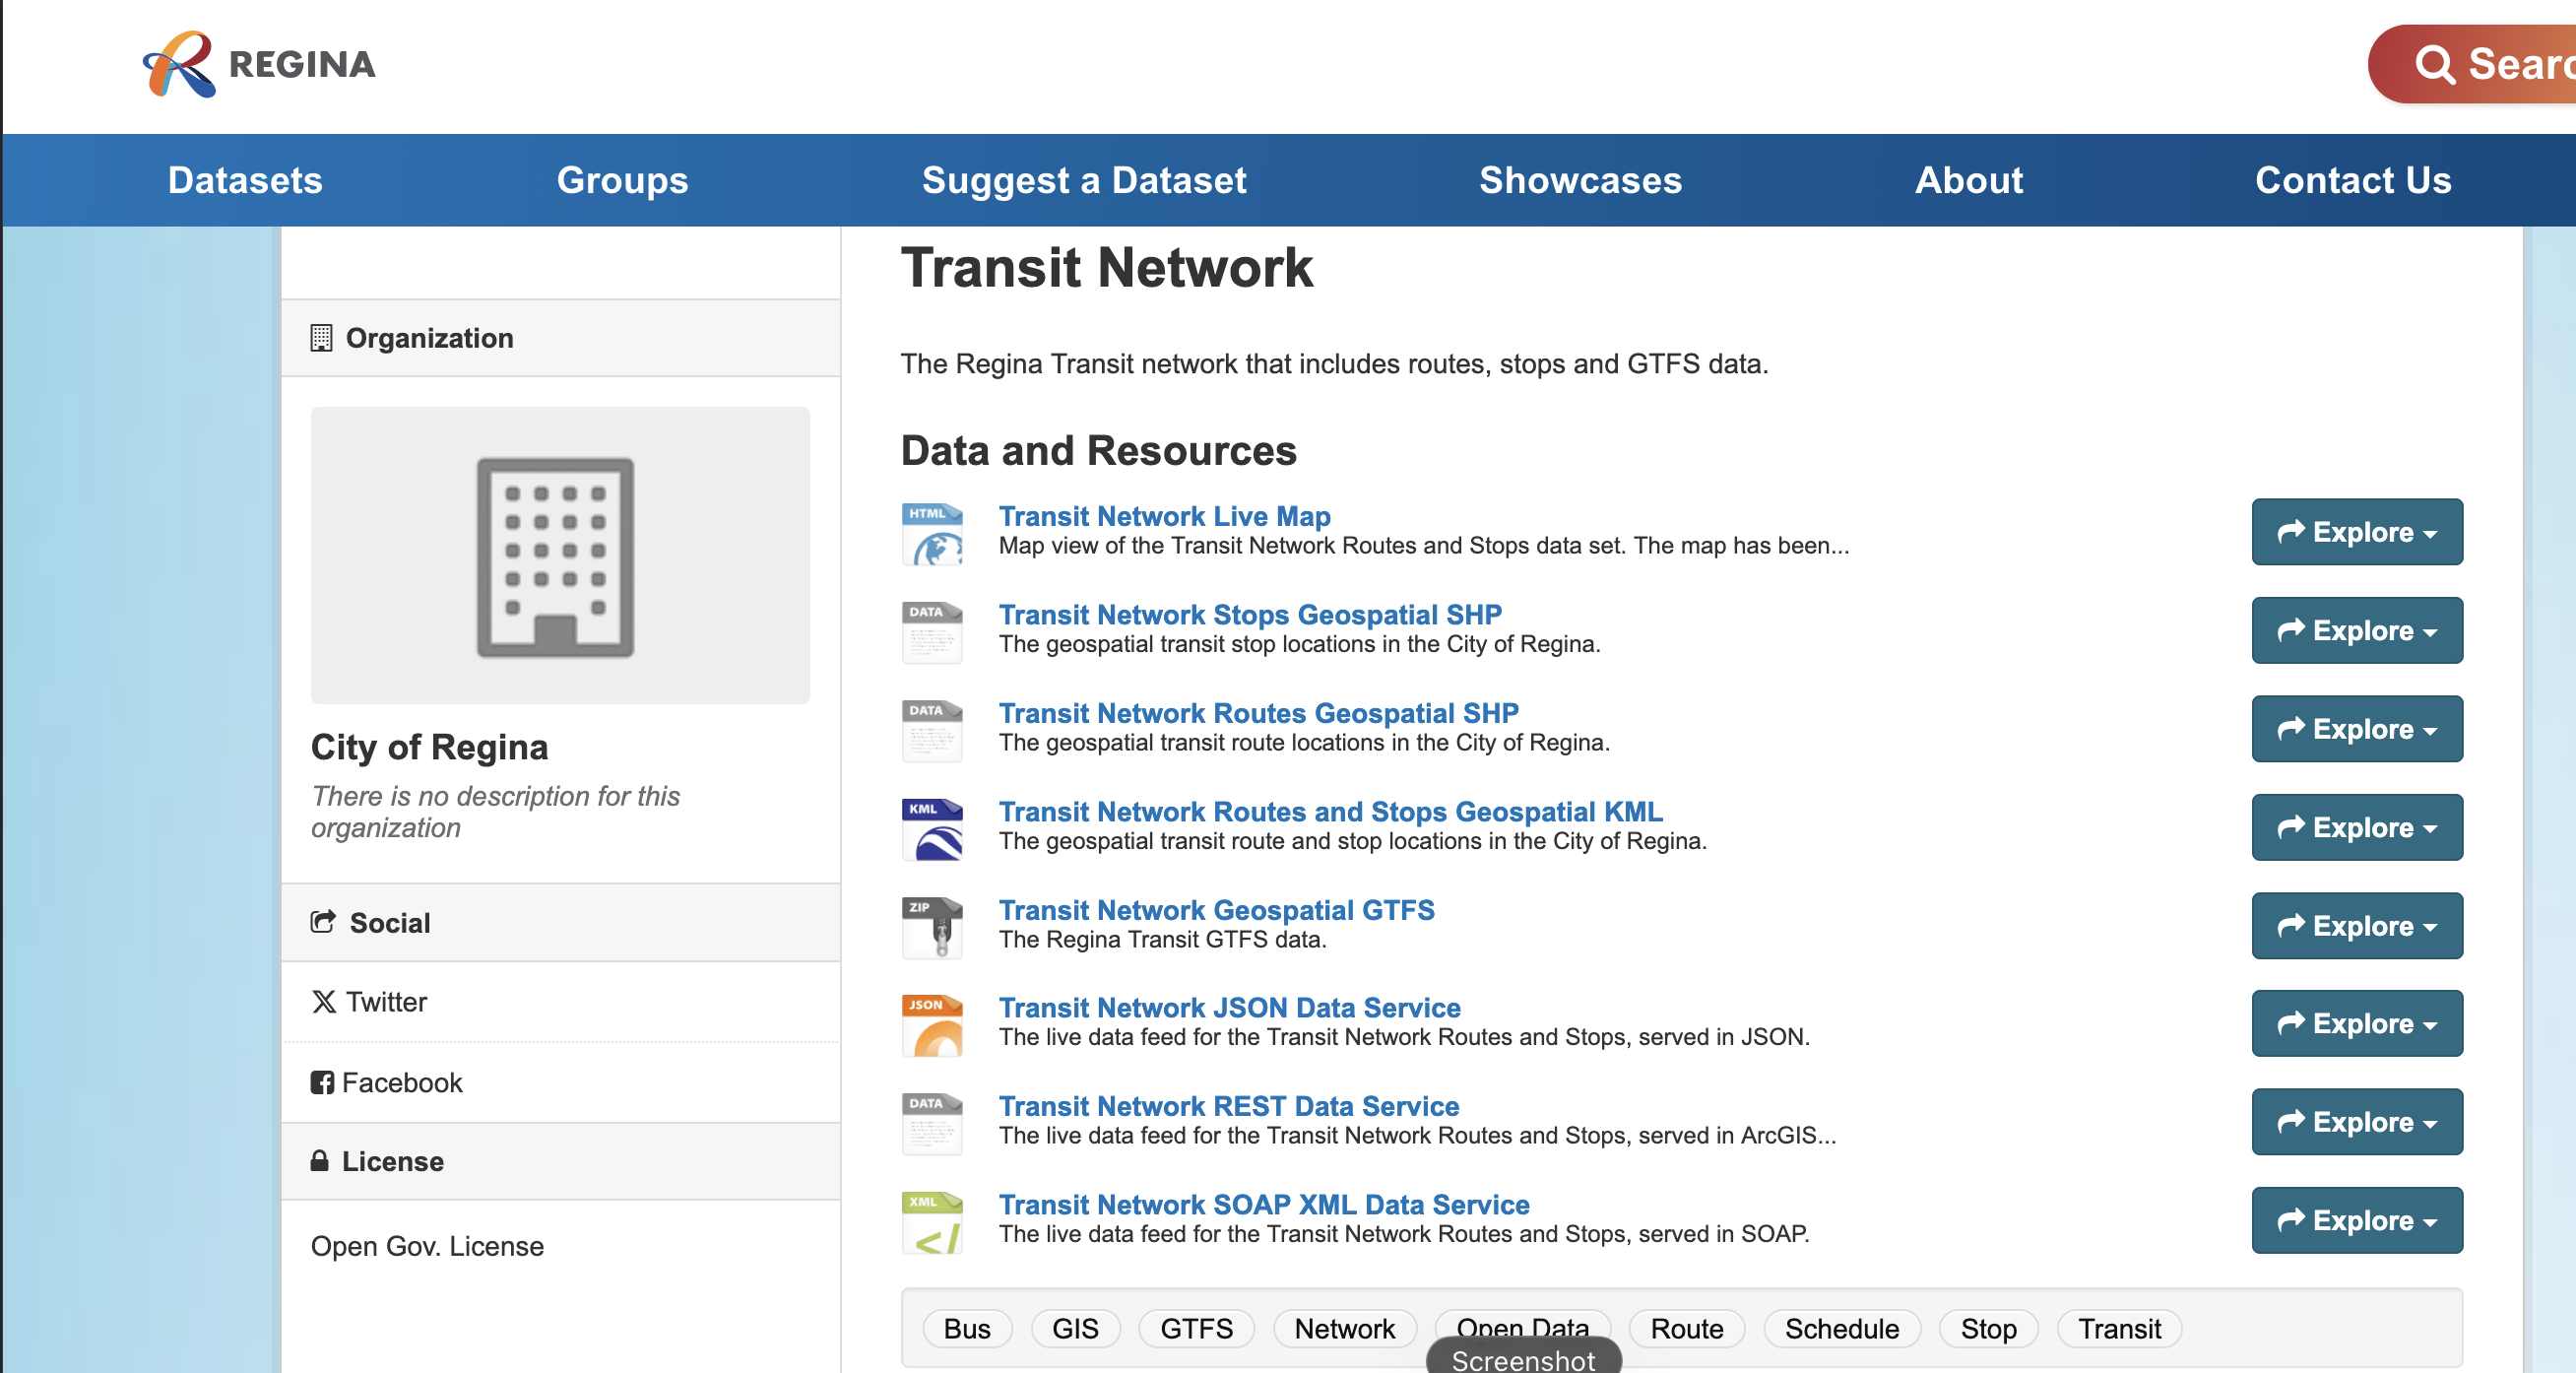

In [4]:
from IPython.display import Image
Image('open_regina_license.png')

 ## Why I used a Jupyter Notebook

 - Technical Skills
 - Dataset size[1]
 - Workflow





 [1] CS 365 - Data Cleaning: Concepts & Algorithms, Lecture 6: September 15, 2025

 ## Imported Python Libraries

 ```python
 import numpy as np # scientific computing for large, multi-dimensional arrays
 from matplotlib import pyplot as plt # creates static, animated, and interactive visualizations
 import pandas as pd #creates 2D, size-mutable, heterogeneous tables called data frames
 import json # read and write json files
 import plotly.graph_objects as go # interactive graphics like maps
 from pyproj import Transformer # cartography and coordinate transformations
 ```

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import json
import plotly.graph_objects as go
from pyproj import Transformer

## Raw Data Snapshot: Bus Stops

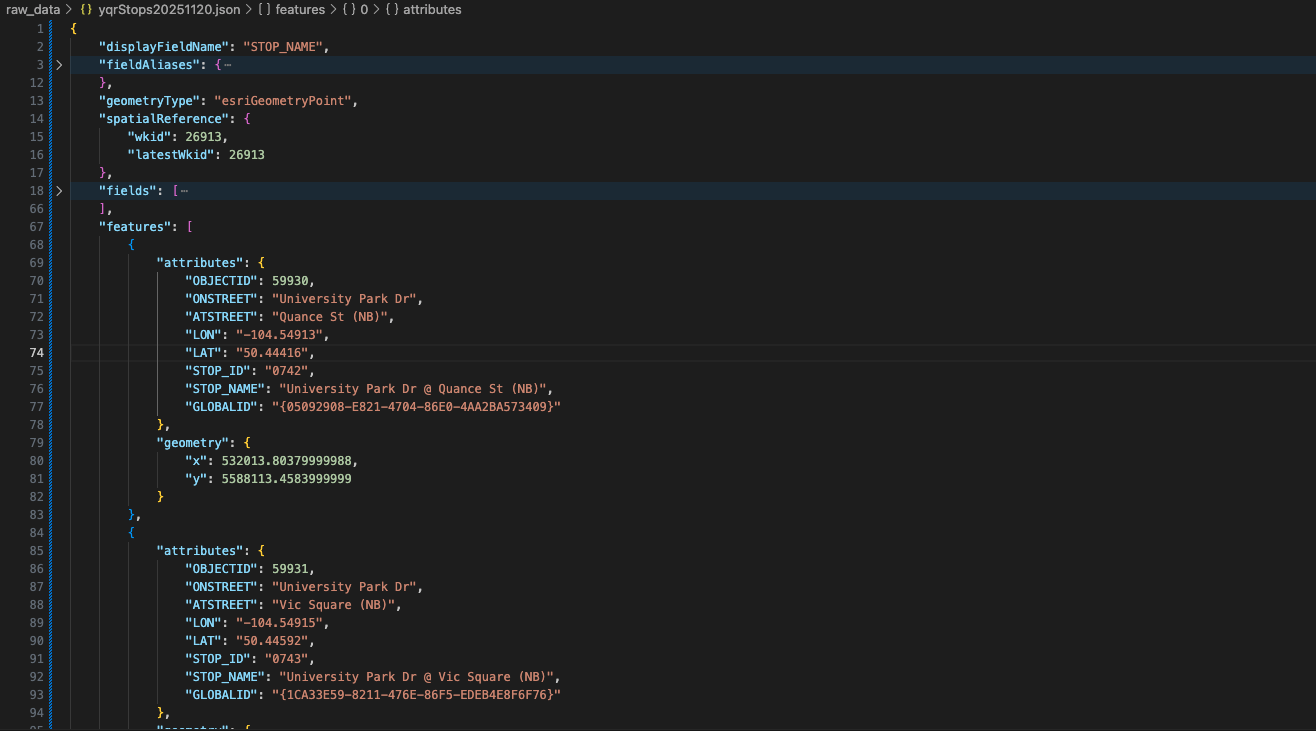

In [6]:
mr.Markdown("""## Raw Data Snapshot: Bus Stops""")
Image('stops_raw_data.png')

In [7]:
mr.Markdown("""
```python
# Load JSON data
try:
    with open('raw_data/yqrStops.json', 'r') as f:
        stop_data = json.load(f)
except json.decoder.JSONDecodeError as e:
    print("Invalid JSON", e)

# Normalize nested JSON structure
df_stops = pd.json_normalize(stop_data['features'])
```
""")


```python
# Load JSON data
try:
    with open('raw_data/yqrStops.json', 'r') as f:
        stop_data = json.load(f)
except json.decoder.JSONDecodeError as e:
    print("Invalid JSON", e)

# Normalize nested JSON structure
df_stops = pd.json_normalize(stop_data['features'])
```


In [8]:
# Load stop data
try:
    with open('raw_data/yqrStops.json', 'r') as f:
        stop_data = json.load(f)
except json.decoder.JSONDecodeError as e:
    print("Invalid JSON", e)

df_stops = pd.json_normalize(stop_data['features'])

mr.Markdown(f"**Loaded bus stops:**{len(df_stops)}")
df_stops.head(10)

**Loaded bus stops:**1000

attributes.OBJECTID attributes.ONSTREET    attributes.ATSTREET  \
0                59930  University Park Dr         Quance St (NB)   
1                59931  University Park Dr        Vic Square (NB)   
2                59932            Fleet St  North Service Rd (NB)   
3                59933            Fleet St          Fines Dr (NB)   
4                59934       Cambridge Ave      Milford Cres (WB)   
5                59935       Cambridge Ave      Glencairn Rd (WB)   
6                59936       Cambridge Ave      Cavendish St (WB)   
7                59937           Oxford St          10th Ave (NB)   
8                59938           Oxford St     Cambridge Ave (NB)   
9                59939             9th Ave         Oxford St (EB)   

  attributes.LON attributes.LAT attributes.STOP_ID  \
0     -104.54913       50.44416               0742   
1     -104.54915       50.44592               0743   
2    -104.549126      50.448609               0744   
3    -104.549111      50.449614               0745   
4      -104.5513       50.45041               0746   
5    -104.555519      50.450435               0747   
6    -104.558621       50.45041               0748   
7    -104.560568       50.45226               0749   
8    -104.560586      50.450769               0750   
9     -104.56007      50.453429               0751   

                   attributes.STOP_NAME  \
0   University Park Dr @ Quance St (NB)   
1  University Park Dr @ Vic Square (NB)   
2      Fleet St @ North Service Rd (NB)   
3              Fleet St @ Fines Dr (NB)   
4     Cambridge Ave @ Milford Cres (WB)   
5     Cambridge Ave @ Glencairn Rd (WB)   
6     Cambridge Ave @ Cavendish St (WB)   
7             Oxford St @ 10th Ave (NB)   
8        Oxford St @ Cambridge Ave (NB)   
9              9th Ave @ Oxford St (EB)   

                      attributes.GLOBALID   geometry.x    geometry.y  
0  {05092908-E821-4704-86E0-4AA2BA573409}  532013.8038  5.588113e+06  
1  {1CA33E59-8211-476E-86F5-EDEB4E8F6F76}  532011.1964  5.588309e+06  
2  {AF32D4D7-5833-4BEB-B7B0-3DD5491E1885}  532011.0863  5.588608e+06  
3  {633EBFA2-7015-478B-B732-6FC74F963853}  532011.4732  5.588720e+06  
4  {E157B3F1-6F6F-4D21-98A0-4A928B9822A4}  531855.5283  5.588807e+06  
5  {2F4D0044-C4D7-4424-B1C9-4B78B45A3348}  531555.9842  5.588808e+06  
6  {7C30EF11-BFAF-4162-89C3-3768C41F2A8A}  531335.7747  5.588804e+06  
7  {0BB07D63-9D06-41F1-841E-DE5524AE42EE}  531196.3310  5.589009e+06  
8  {A37A05C8-F47D-4C97-B68A-5F5265FBA635}  531196.0336  5.588843e+06  
9  {40A46AD1-F6DA-4055-9D4E-9C1444C332E1}  531230.9155  5.589139e+06

 # Data Profiling: Quality Assessment - Stops

 - **Data types** - Are coordinates stored correctly?
 - **Missing values** - Which columns have gaps?
 - **Duplicates** - Any duplicate stop IDs?
 - **Outliers** - Any stops in unexpected locations?
 - **Cardinalities** - How many unique stops?

 ### BUS STOP DATA TYPES

In [9]:
print(df_stops.dtypes[df_stops.columns[:8]])

attributes.OBJECTID      int64
attributes.ONSTREET     object
attributes.ATSTREET     object
attributes.LON          object
attributes.LAT          object
attributes.STOP_ID      object
attributes.STOP_NAME    object
attributes.GLOBALID     object
dtype: object


 ## Missing Values

In [10]:
missing = df_stops.isnull().sum()
print(f"Number of Missing Values: {len(missing[missing > 0])}")
print("Missing Values")
print(missing)

Number of Missing Values: 1
Missing Values
attributes.OBJECTID     0
attributes.ONSTREET     0
attributes.ATSTREET     1
attributes.LON          0
attributes.LAT          0
attributes.STOP_ID      0
attributes.STOP_NAME    0
attributes.GLOBALID     0
geometry.x              0
geometry.y              0
dtype: int64


 ## Duplicates

In [11]:
duplicates = df_stops.duplicated(subset=['attributes.STOP_ID']).sum()
print(f"Number of Duplicate Stops - checked by stop ID: {duplicates}")

Number of Duplicate Stops - checked by stop ID: 0


 ### Sample Latitude Values

In [12]:
df_stops['attributes.LAT'].head(5).tolist()

['50.44416', '50.44592', '50.448609', '50.449614', '50.45041']

 # Cleaning: Bus Stop Text Standardization & Type Conversions

In [13]:
mr.Markdown("""
## Problems identified
- Inconsistent text formatting (mixed case, whitespace)
- Coordinates stored as strings instead of numeric latitude and longitude
- Missing values in street names
""")


## Problems identified
- Inconsistent text formatting (mixed case, whitespace)
- Coordinates stored as strings instead of numeric latitude and longitude
- Missing values in street names


In [14]:
mr.Markdown("""
**Sample Solutions:**
```python
# Text standardization
df_stops['attributes.ONSTREET'] = df_stops['attributes.ONSTREET'].str.strip().str.upper()
df_stops['attributes.ATSTREET'] = df_stops['attributes.ATSTREET'].str.strip().str.upper()
...
# Missing value imputation
df_stops = df_stops.fillna({'attributes.ATSTREET': "DOROTHY ST (SB)"})

# Data correction
df_stops['attributes.ONSTREET'] = df_stops['attributes.ONSTREET'].str.replace(
    "1060 DOROTHY ST (SB)", "DOROTHY ST", regex=False
)
```
""")


**Sample Solutions:**
```python
# Text standardization
df_stops['attributes.ONSTREET'] = df_stops['attributes.ONSTREET'].str.strip().str.upper()
df_stops['attributes.ATSTREET'] = df_stops['attributes.ATSTREET'].str.strip().str.upper()
...
# Missing value imputation
df_stops = df_stops.fillna({'attributes.ATSTREET': "DOROTHY ST (SB)"})

# Data correction
df_stops['attributes.ONSTREET'] = df_stops['attributes.ONSTREET'].str.replace(
    "1060 DOROTHY ST (SB)", "DOROTHY ST", regex=False
)
```


In [15]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_stops):
    # Remove leading and trailing whitespace in column: 'attributes.ONSTREET'
    df_stops['attributes.ONSTREET'] = df_stops['attributes.ONSTREET'].str.strip()
    # Convert text to uppercase in column: 'attributes.ONSTREET'
    df_stops['attributes.ONSTREET'] = df_stops['attributes.ONSTREET'].str.upper()
    # Remove leading and trailing whitespace in column: 'attributes.ATSTREET'
    df_stops['attributes.ATSTREET'] = df_stops['attributes.ATSTREET'].str.strip()
    # Convert text to uppercase in column: 'attributes.ATSTREET'
    df_stops['attributes.ATSTREET'] = df_stops['attributes.ATSTREET'].str.upper()
    # Remove leading and trailing whitespace in column: 'attributes.LON'
    df_stops['attributes.LON'] = df_stops['attributes.LON'].str.strip()
    # Remove leading and trailing whitespace in column: 'attributes.LAT'
    df_stops['attributes.LAT'] = df_stops['attributes.LAT'].str.strip()
    # Remove leading and trailing whitespace in column: 'stop_id'
    df_stops['attributes.STOP_ID'] = df_stops['attributes.STOP_ID'].str.strip()
    # Remove leading and trailing whitespace in column: 'attributes.STOP_NAME'
    df_stops['attributes.STOP_NAME'] = df_stops['attributes.STOP_NAME'].str.strip()
    # Convert text to uppercase in column: 'attributes.STOP_NAME'
    df_stops['attributes.STOP_NAME'] = df_stops['attributes.STOP_NAME'].str.upper()
    # Remove leading and trailing whitespace in column: 'attributes.GLOBALID'
    df_stops['attributes.GLOBALID'] = df_stops['attributes.GLOBALID'].str.strip()
    # Replace missing values with "DOROTHY ST (SB)" in column: 'attributes.ATSTREET'
    df_stops = df_stops.fillna({'attributes.ATSTREET':"DOROTHY ST (SB)"})
    # Replace all instances of "1060 DOROTHY ST (SB)" with "DOROTHY ST" in column: 'attributes.ONSTREET'
    df_stops['attributes.ONSTREET'] = df_stops['attributes.ONSTREET'].str.replace("1060 DOROTHY ST (SB)", "DOROTHY ST", case=False, regex=False)
    # Rename column 'attributes.ONSTREET' to 'on_street'
    df_stops = df_stops.rename(columns={'attributes.ONSTREET': 'on_street'})
    # Rename column 'attributes.ATSTREET' to 'at_street'
    df_stops = df_stops.rename(columns={'attributes.ATSTREET': 'at_street'})
    # Rename column 'attributes.LON' to 'lon'
    df_stops = df_stops.rename(columns={'attributes.LON': 'lon'})
    # Rename column 'attributes.LAT' to 'lat'
    df_stops = df_stops.rename(columns={'attributes.LAT': 'lat'})
    # Rename column 'stop_id' to 'stop_id'
    df_stops = df_stops.rename(columns={'attributes.STOP_ID': 'stop_id'})
    # Rename column 'attributes.STOP_NAME' to 'stop_name'
    df_stops = df_stops.rename(columns={'attributes.STOP_NAME': 'stop_name'})
    # Rename column 'attributes.GLOBALID' to 'global_id'
    df_stops = df_stops.rename(columns={'attributes.GLOBALID': 'global_id'})
    # Rename column 'attributes.OBJECTID' to 'object_id'
    df_stops = df_stops.rename(columns={'attributes.OBJECTID': 'object_id'})
    return df_stops

clean_stops= clean_data(df_stops.copy())
clean_stops.head()

mr.Markdown(f"**Cleaned {len(clean_stops)} bus stops**")
clean_stops.head()

**Cleaned 1000 bus stops**

object_id           on_street              at_street          lon  \
0      59930  UNIVERSITY PARK DR         QUANCE ST (NB)   -104.54913   
1      59931  UNIVERSITY PARK DR        VIC SQUARE (NB)   -104.54915   
2      59932            FLEET ST  NORTH SERVICE RD (NB)  -104.549126   
3      59933            FLEET ST          FINES DR (NB)  -104.549111   
4      59934       CAMBRIDGE AVE      MILFORD CRES (WB)    -104.5513   

         lat stop_id                             stop_name  \
0   50.44416    0742   UNIVERSITY PARK DR @ QUANCE ST (NB)   
1   50.44592    0743  UNIVERSITY PARK DR @ VIC SQUARE (NB)   
2  50.448609    0744      FLEET ST @ NORTH SERVICE RD (NB)   
3  50.449614    0745              FLEET ST @ FINES DR (NB)   
4   50.45041    0746     CAMBRIDGE AVE @ MILFORD CRES (WB)   

                                global_id   geometry.x    geometry.y  
0  {05092908-E821-4704-86E0-4AA2BA573409}  532013.8038  5.588113e+06  
1  {1CA33E59-8211-476E-86F5-EDEB4E8F6F76}  532011.1964  5.588309e+06  
2  {AF32D4D7-5833-4BEB-B7B0-3DD5491E1885}  532011.0863  5.588608e+06  
3  {633EBFA2-7015-478B-B732-6FC74F963853}  532011.4732  5.588720e+06  
4  {E157B3F1-6F6F-4D21-98A0-4A928B9822A4}  531855.5283  5.588807e+06

 ## Raw Data Snapshot: Bus Routes

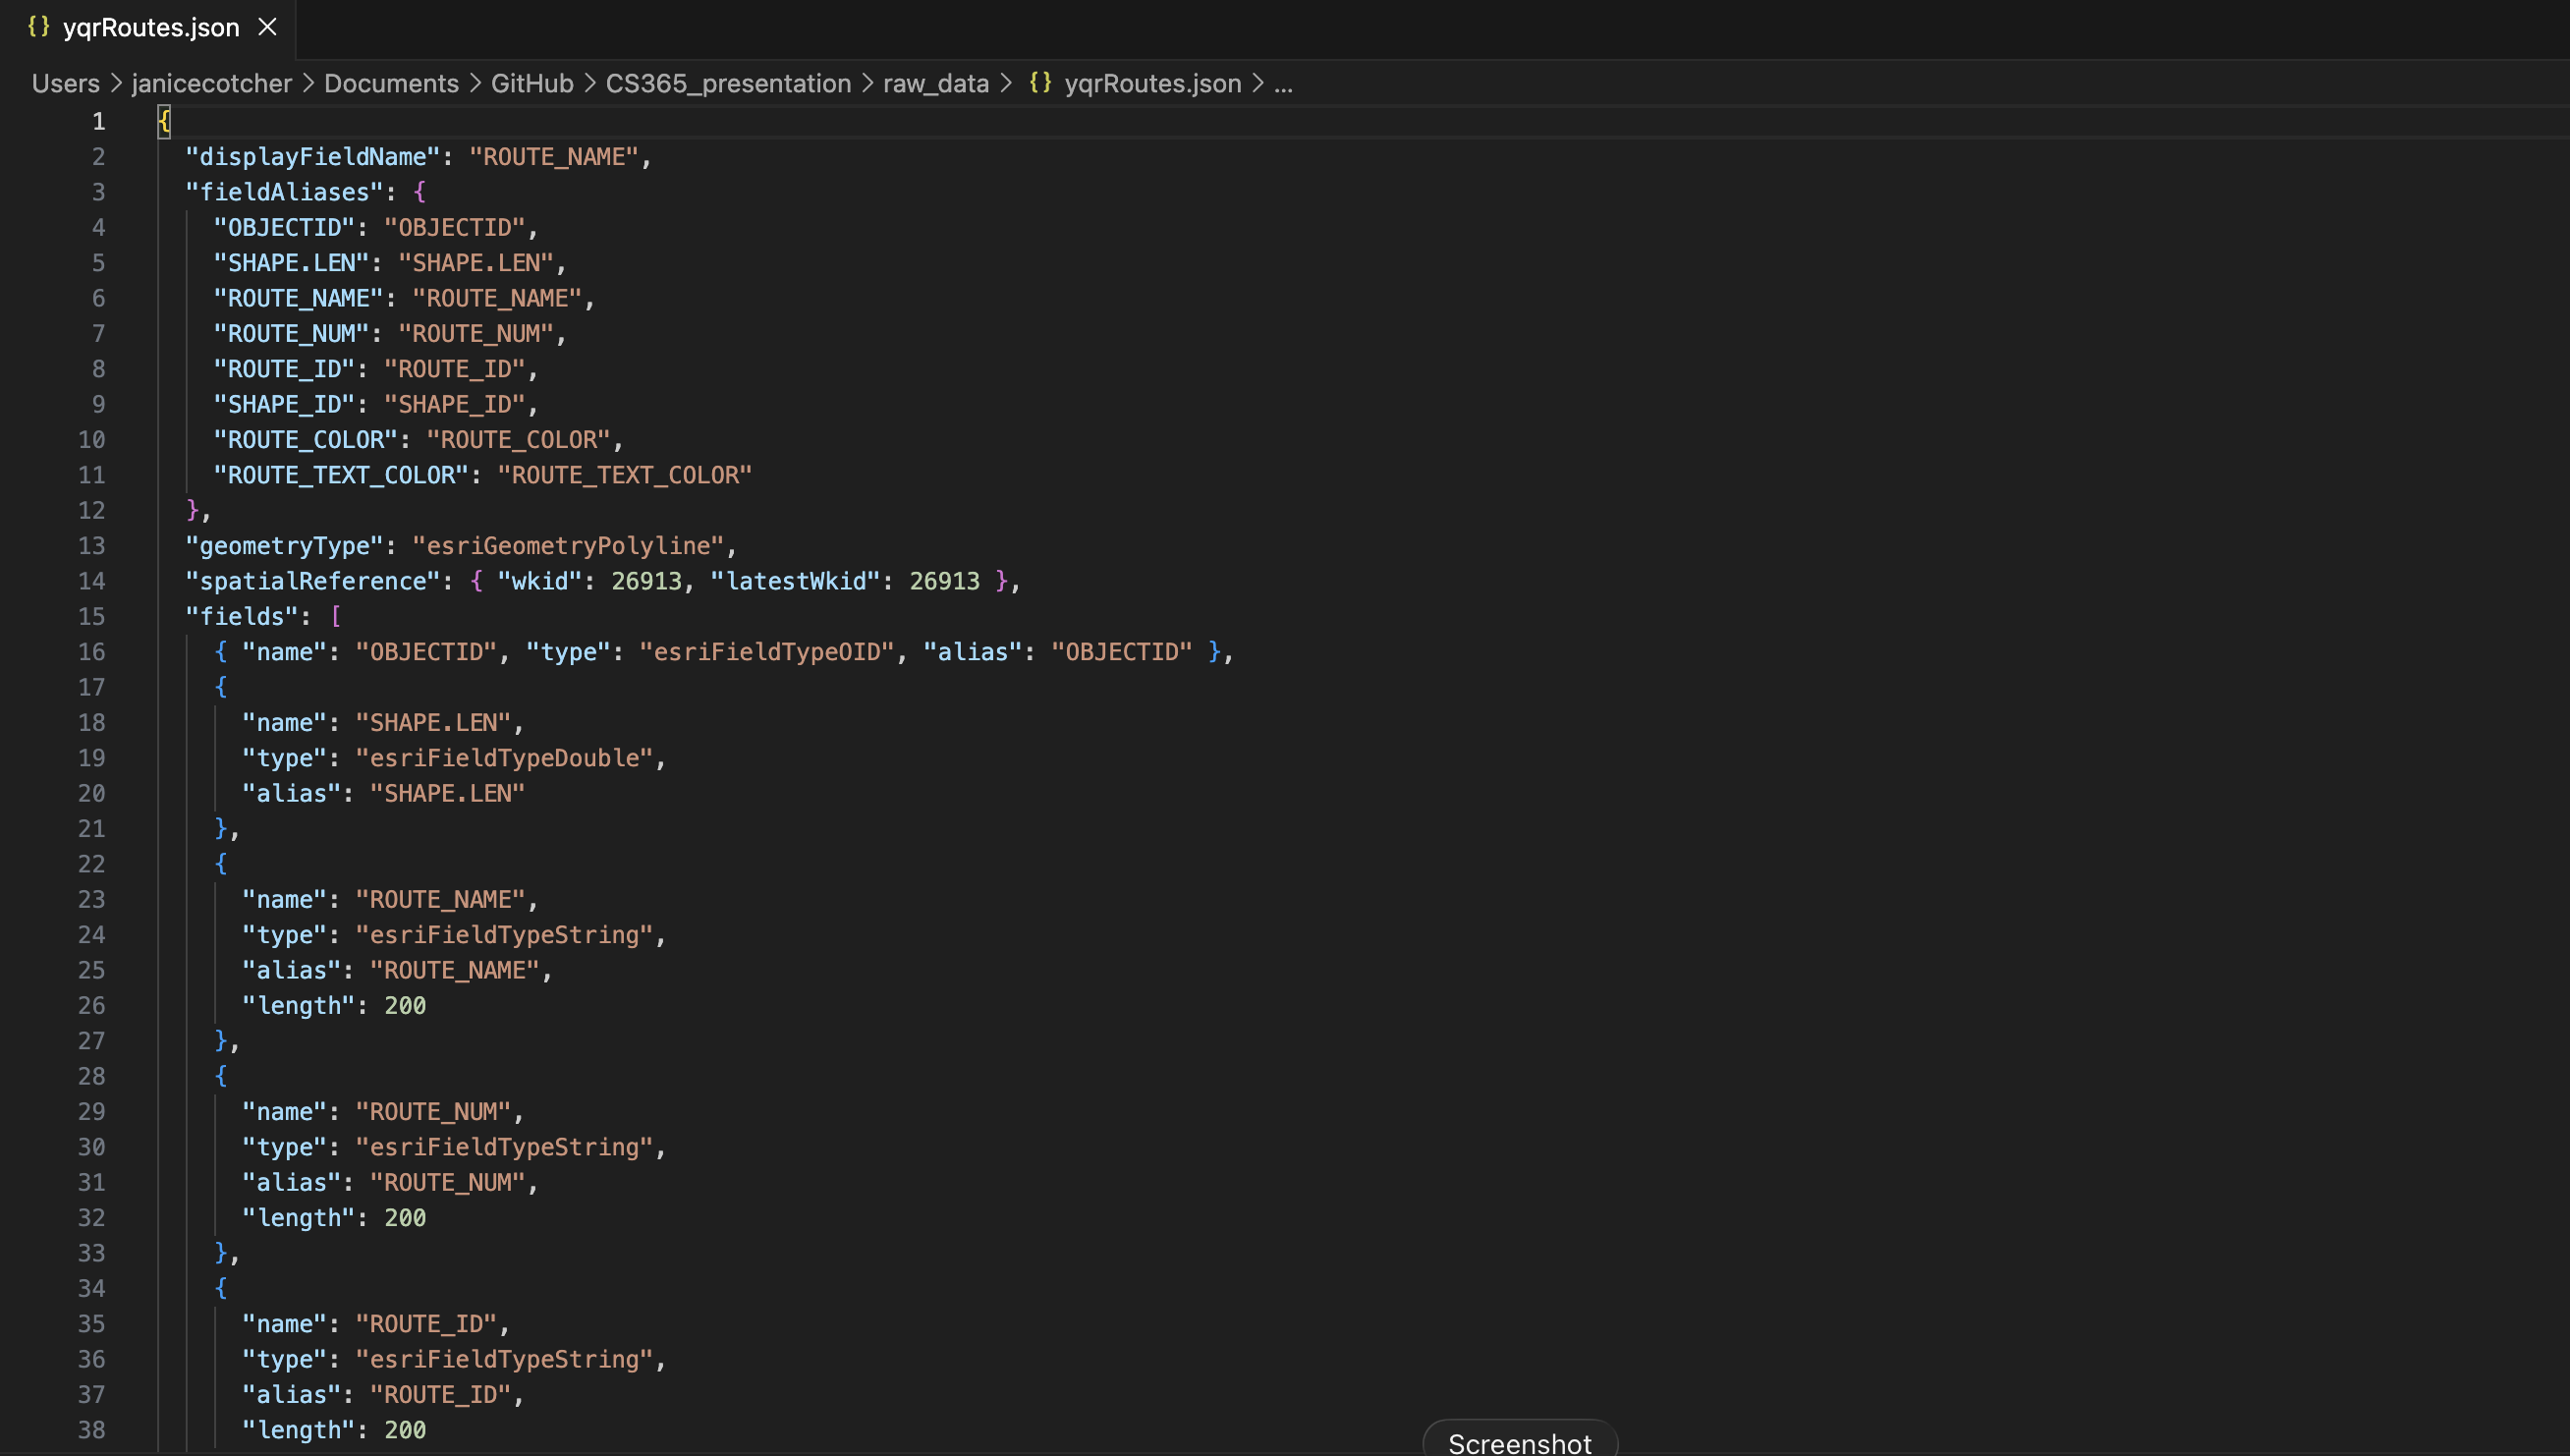

In [16]:
Image('routes_raw_data_1.png')

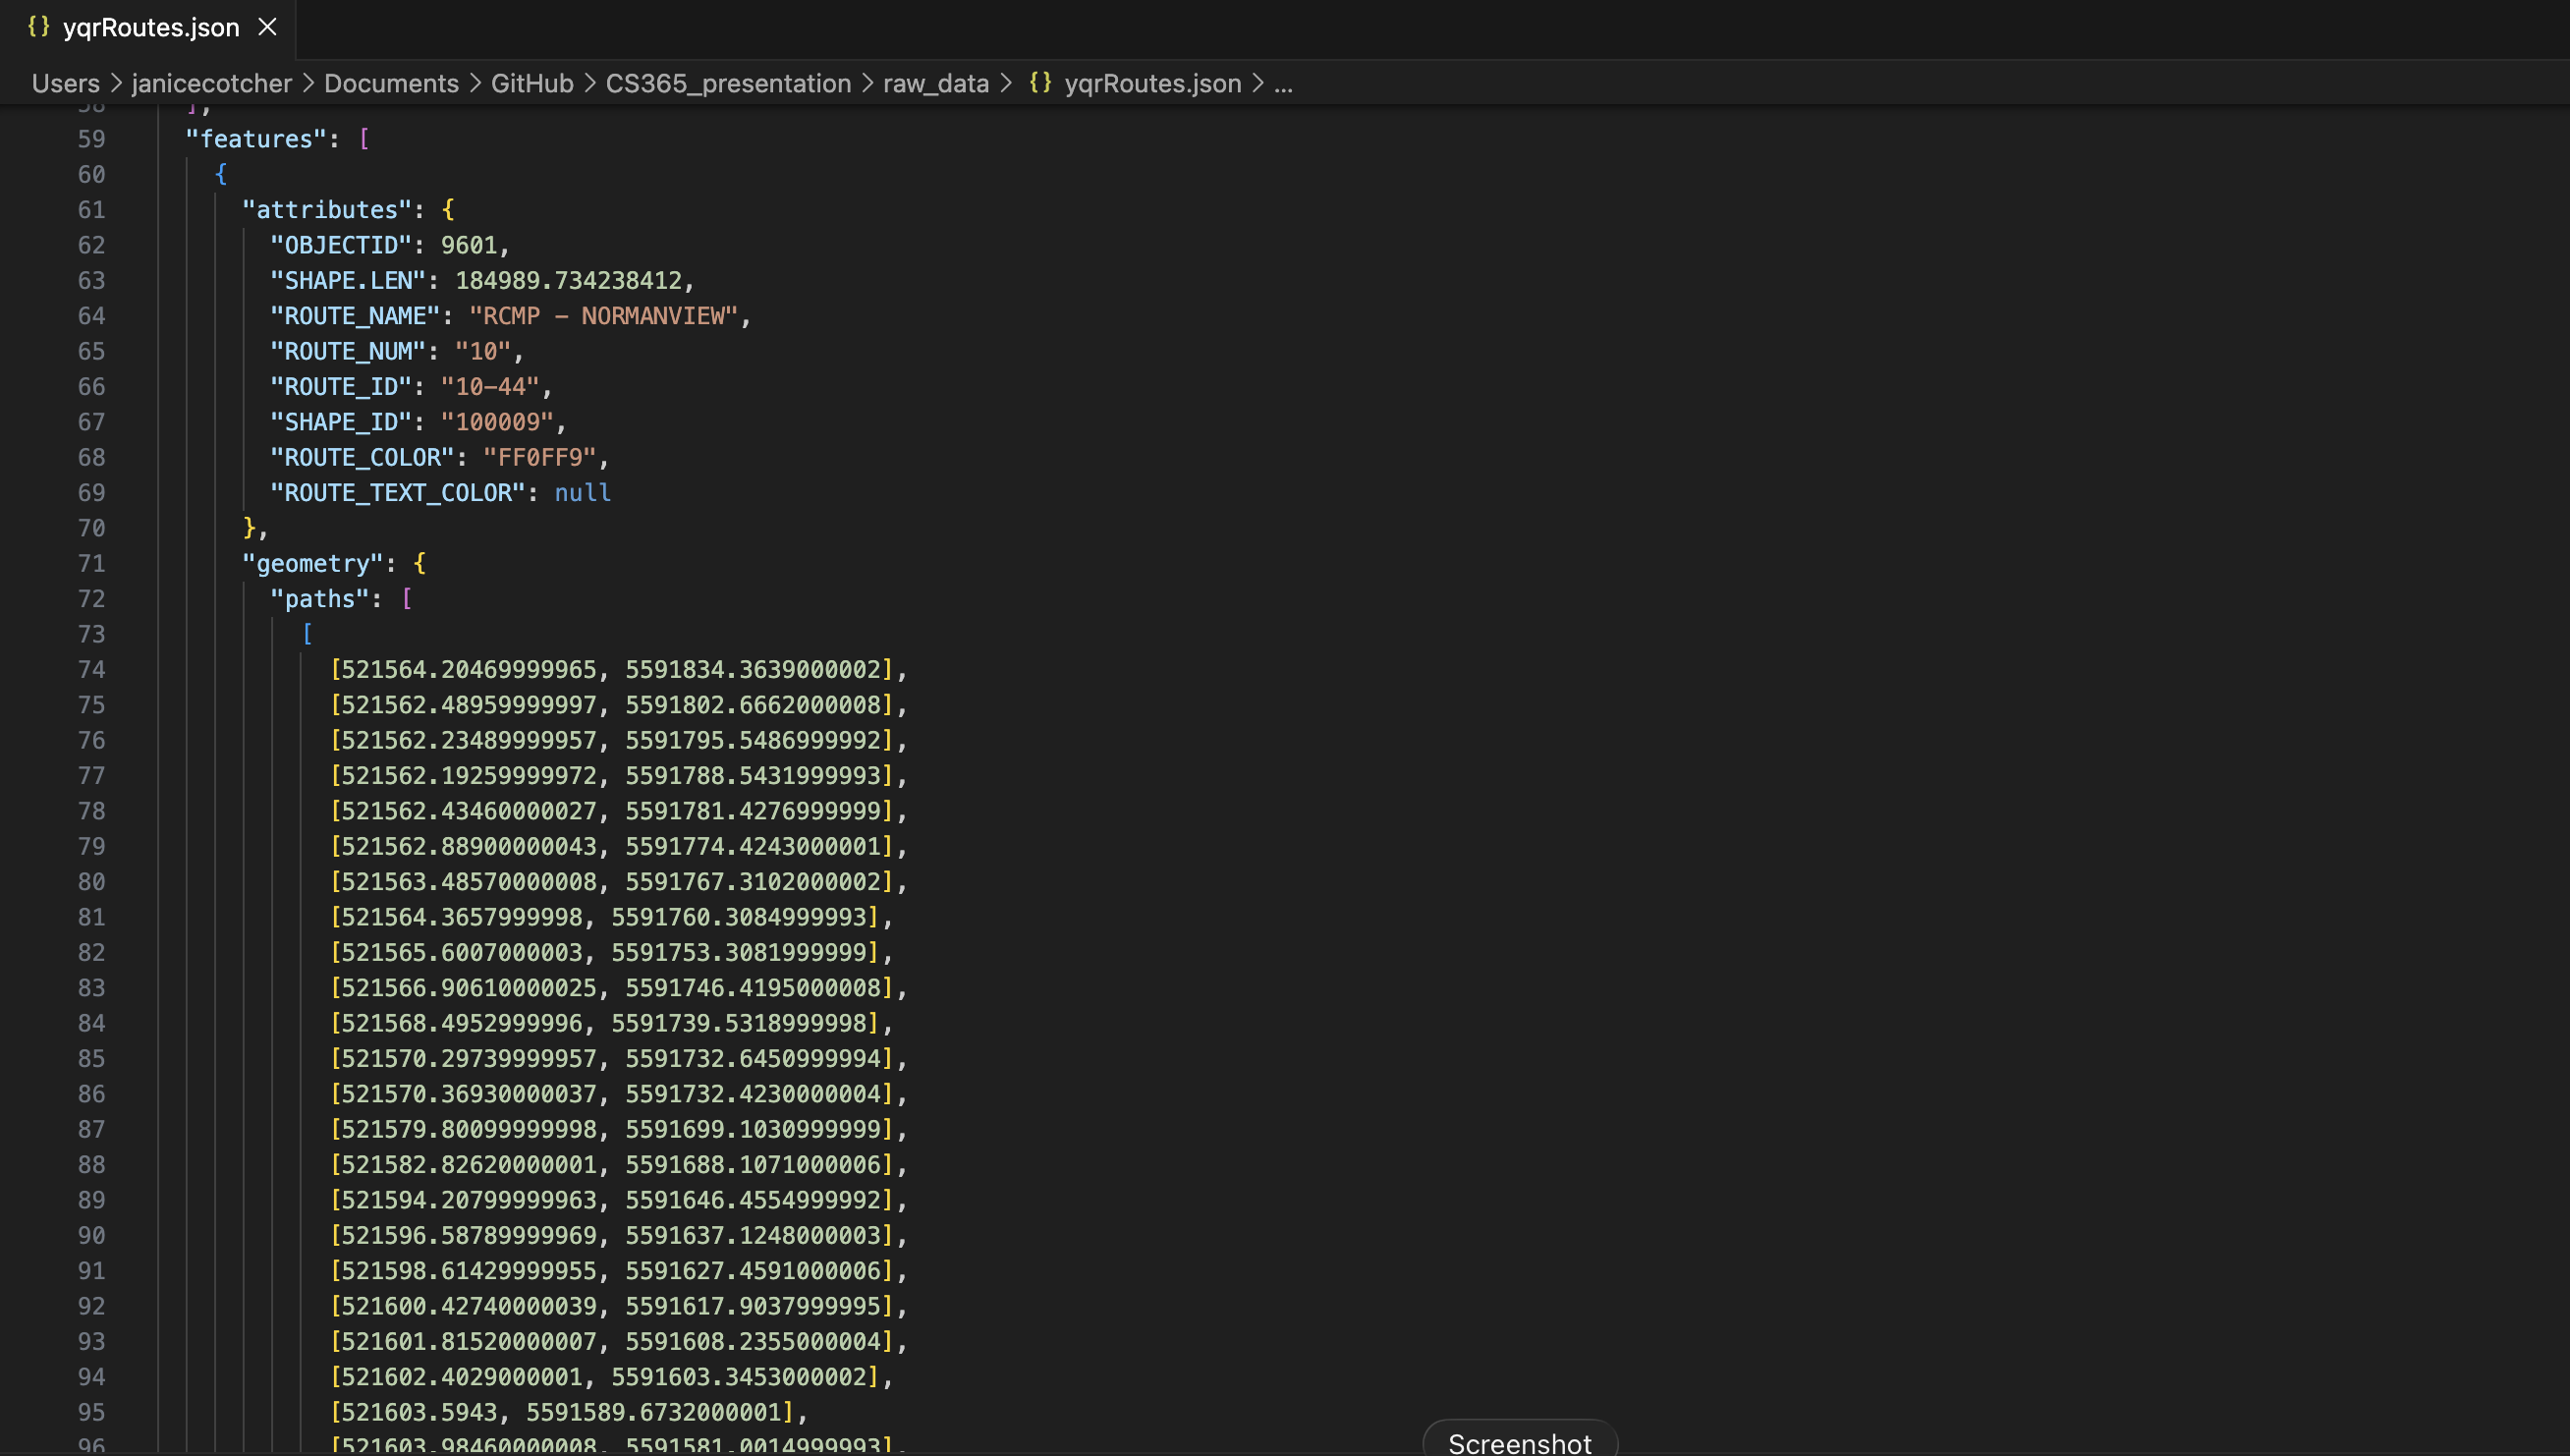

In [17]:
Image('routes_raw_data_2.png')

## Over 90K lines, ~4.9MB

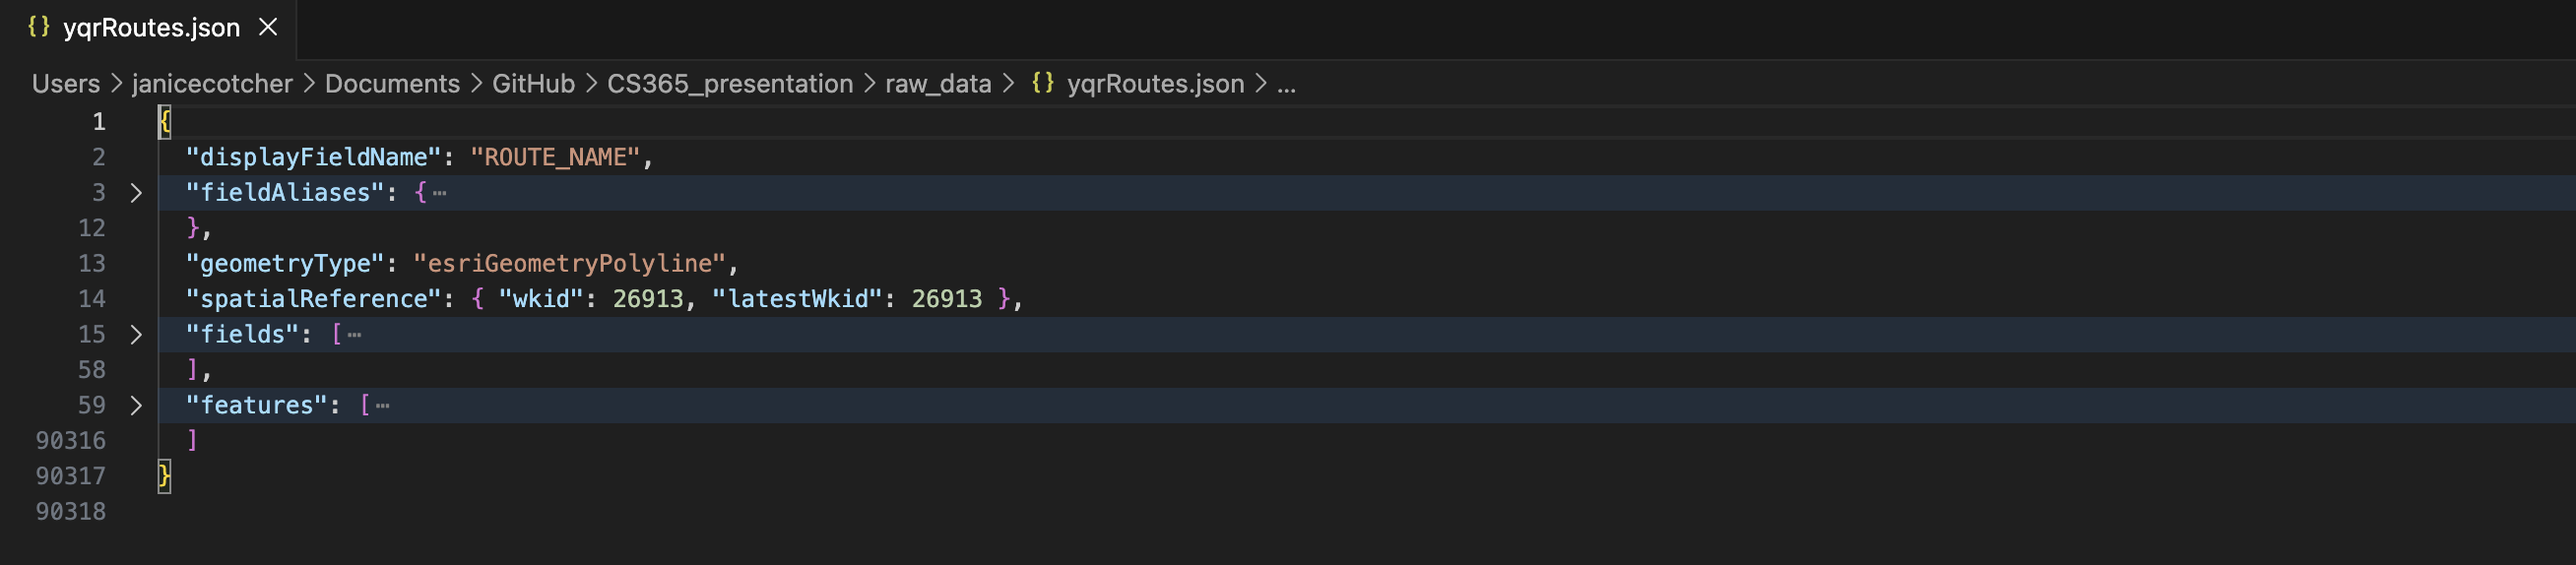

In [18]:
mr.Markdown("""## Over 90K lines, ~4.9MB""")
Image('routes_raw_data_3.png')

  ## Loading Routes Data

In [19]:
mr.Markdown("""
```python
# Load routes data
with open('raw_data/yqrRoutes.json', 'r') as f:
    routes_data = json.load(f)

df_routes = pd.json_normalize(routes_data['features'])
```
""")


```python
# Load routes data
with open('raw_data/yqrRoutes.json', 'r') as f:
    routes_data = json.load(f)

df_routes = pd.json_normalize(routes_data['features'])
```


In [20]:
# Load routes
try:
    with open('raw_data/yqrRoutes.json', 'r') as f:
        routes_data = json.load(f)
except json.decoder.JSONDecodeError as e:
    print("Invalid JSON", e)

df_routes = pd.json_normalize(routes_data['features'])

In [21]:
df_routes

attributes.OBJECTID  attributes.SHAPE.LEN  \
0                  9601         184989.734238   
1                  9602          47401.585527   
2                  9603         180172.679776   
3                  9604          92096.531471   
4                  9605          57978.961540   
5                  9606         115065.916376   
6                  9607         664900.169679   
7                  9608         492246.798973   
8                  9609          24622.479650   
9                  9610          94968.614798   
10                 9611         134424.603144   
11                 9612          63697.887437   
12                 9613          85020.879476   
13                 9614          47980.063524   
14                 9615         108643.699393   
15                 9616          60200.279881   
16                 9617          90660.507444   
17                 9618          64226.528459   
18                 9619          89851.981305   
19                 9620         119587.761523   
20                 9621          68741.318232   
21                 9622          40124.363010   

                  attributes.ROUTE_NAME attributes.ROUTE_NUM  \
0                     RCMP - NORMANVIEW                   10   
1          HARBOUR LANDING - UNIVERSITY                   18   
2         UNIVERSITY - SHERWOOD ESTATES                    3   
3   ALBERT S EXPRESS - ALBERT N EXPRESS                   40   
4        ARCOLA E EXP - ARCOLA DWTN EXP                   60   
5                  GLENCAIRN - WHITMORE                    7   
6         DIEPPE/WESTERRA - BROAD NORTH                    1   
7            VARSITY PARK - MOUNT ROYAL                   12   
8                    AIRPORT - DOWNTOWN                   24   
9              UNIVERSITY - ARCOLA EAST                   22   
10           ARGYLE PARK - WOOD MEADOWS                    2   
11        UNIVERSITY - ROCHDALE EXPRESS                   30   
12              HILLSDALE - WALSH ACRES                    4   
13                HAWKSTONE - LAKERIDGE                   16   
14  MAPLE RIDGE WEST - MAPLE RIDGE EAST                   17   
15        HERITAGE WEST - HERITAGE EAST                   15   
16              PARKRIDGE - ALBERT PARK                    9   
17           WESTHILL - ROSS INDUSTRIAL                    6   
18          NORMANDY HEIGHTS - EASTVIEW                    8   
19                   UPLANDS - DOWNTOWN                    5   
20               UNIVERSITY - GLENCAIRN                   21   
21   VICTORIA E EXP - VICTORIA DWTN EXP                   50   

   attributes.ROUTE_ID attributes.SHAPE_ID attributes.ROUTE_COLOR  \
0                10-44              100009                 FF0FF9   
1                18-44              180005                 80FF00   
2                 3-44               30010                 A8A800   
3                40-44              400004                 00CECE   
4                60-44              600017                 808000   
5                 7-44               70002                 0000FF   
6                 1-44               10027                 1AA68A   
7                12-44              120008                 00C100   
8                24-44              240010                 9D9D9D   
9                22-44              220005                 00A600   
10                2-44               20005                 FF8000   
11               30-44              300001                 FFFF00   
12                4-44               40003                 EAEA00   
13               16-44              160002                 494949   
14               17-44              170009                 BE50AB   
15               15-44              150018                 D700D7   
16                9-44               90001                 BF00BF   
17                6-44               60003                 006200   
18                8-44               80007                 A40000   
19                5-44 

 # Data Profile: Quality Assessment - Routes
 - **Data types** - Are coordinates stored correctly?
 - **Missing values** - Which columns have gaps?
 - **Duplicates** - Any duplicate route IDs?
 - **Outliers** - Any routes in unexpected locations?
 - **Cardinalities** - How many unique routes?


In [22]:
mr.Markdown("""## Route Data Types""")

## Route Data Types

In [23]:
print(df_routes.dtypes[df_routes.columns[:6]])

attributes.OBJECTID        int64
attributes.SHAPE.LEN     float64
attributes.ROUTE_NAME     object
attributes.ROUTE_NUM      object
attributes.ROUTE_ID       object
attributes.SHAPE_ID       object
dtype: object


In [24]:
mr.Markdown("""## Missing Values""")

## Missing Values

In [25]:
missing = df_routes.isnull().sum()
print(f"Number of Missing Values: {missing[missing > 0] if len(missing[missing > 0]) > 0 else "No missing values"}")
print("Missing Values")
print(missing)

Number of Missing Values: attributes.ROUTE_TEXT_COLOR    16
dtype: int64
Missing Values
attributes.OBJECTID             0
attributes.SHAPE.LEN            0
attributes.ROUTE_NAME           0
attributes.ROUTE_NUM            0
attributes.ROUTE_ID             0
attributes.SHAPE_ID             0
attributes.ROUTE_COLOR          0
attributes.ROUTE_TEXT_COLOR    16
geometry.paths                  0
dtype: int64


In [26]:
mr.Markdown("""## DUPLICATES""")

## DUPLICATES

In [27]:
duplicates = df_routes.duplicated(subset=['attributes.ROUTE_ID']).sum()
print(f"Duplicate route IDs: {duplicates}")

Duplicate route IDs: 0


 # Cleaning: Bus Route Text Standardization & Type Conversions

 ## Data Wrangler Demo

 ## Bus Route Cleaning Summary
 - inconsistent text formatting
 - missing colours
 - hex values missing #
 - standardize column names

In [28]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_routes):
    # Remove leading and trailing whitespace in columns: 'attributes.ROUTE_NAME', 'attributes.ROUTE_NUM' and 4 other columns
    df_routes['attributes.ROUTE_NAME'] = df_routes['attributes.ROUTE_NAME'].str.strip()
    df_routes['attributes.ROUTE_NUM'] = df_routes['attributes.ROUTE_NUM'].str.strip()
    df_routes['attributes.ROUTE_ID'] = df_routes['attributes.ROUTE_ID'].str.strip()
    df_routes['attributes.SHAPE_ID'] = df_routes['attributes.SHAPE_ID'].str.strip()
    # add a hashtag in front of the route colour hex values 
    df_routes['attributes.ROUTE_COLOR'] = '#' + (df_routes['attributes.ROUTE_COLOR'].str.strip()).astype(str)
    # Convert text to uppercase in column: 'attributes.ROUTE_NAME'
    df_routes['attributes.ROUTE_NAME'] = df_routes['attributes.ROUTE_NAME'].str.upper()
    # Replace missing values with "FFFFFF" in column: 'attributes.ROUTE_TEXT_COLOR'
    df_routes = df_routes.fillna({'attributes.ROUTE_TEXT_COLOR': "FFFFFF"})
    # add a hashtag in front of the route text colour hex values
    df_routes['attributes.ROUTE_TEXT_COLOR'] = "#"+ (df_routes['attributes.ROUTE_TEXT_COLOR'].str.strip()).astype(str)
     # Rename column 'attributes.SHAPE.LEN' to 'shape_length'
    df_routes = df_routes.rename(columns={'attributes.SHAPE.LEN': 'shape_length'})
    # Rename column 'attributes.ROUTE_NAME' to 'route_name'
    df_routes = df_routes.rename(columns={'attributes.ROUTE_NAME': 'route_name'})
    # Rename column 'attributes.ROUTE_NUM' to 'route_num'
    df_routes = df_routes.rename(columns={'attributes.ROUTE_NUM': 'route_num'})
    # Rename column 'attributes.ROUTE_ID' to 'route_id'
    df_routes = df_routes.rename(columns={'attributes.ROUTE_ID': 'route_id'})
    # Rename column 'attributes.SHAPE_ID' to 'shape_id'
    df_routes = df_routes.rename(columns={'attributes.SHAPE_ID': 'shape_id'})
    # Rename column 'attributes.ROUTE_COLOR' to 'route_color'
    df_routes = df_routes.rename(columns={'attributes.ROUTE_COLOR': 'route_color'})
    # Rename column 'attributes.ROUTE_TEXT_COLOR' to 'route_text_color'
    df_routes = df_routes.rename(columns={'attributes.ROUTE_TEXT_COLOR': 'route_text_color'})
    # Rename column 'geometry.paths' to 'geometry_paths'
    df_routes = df_routes.rename(columns={'geometry.paths': 'geometry_paths'})
    # Rename column 'attributes.OBJECTID' to 'object_id'
    df_routes = df_routes.rename(columns={'attributes.OBJECTID': 'object_id'})
    return df_routes

clean_routes = clean_data(df_routes.copy())
clean_routes.head()

mr.Markdown(f"**Cleaned routes:**{len(clean_routes)}")
clean_routes[['route_num', 'route_name', 'route_color']].head()

**Cleaned routes:**22

route_num                           route_name route_color
0        10                    RCMP - NORMANVIEW     #FF0FF9
1        18         HARBOUR LANDING - UNIVERSITY     #80FF00
2         3        UNIVERSITY - SHERWOOD ESTATES     #A8A800
3        40  ALBERT S EXPRESS - ALBERT N EXPRESS     #00CECE
4        60       ARCOLA E EXP - ARCOLA DWTN EXP     #808000

  ## Transformation Step 1: Loading GTFS Schedule Data

In [29]:
mr.Markdown("""
**GTFS (General Transit Feed Specification)** provides detailed schedule information:

```python
# Load GTFS files
stops_gtfs = pd.read_csv('raw_data/gtfs_data/stops.txt')
routes_gtfs = pd.read_csv('raw_data/gtfs_data/routes.txt')
trips_gtfs = pd.read_csv('raw_data/gtfs_data/trips.txt')
times_gtfs = pd.read_csv('raw_data/gtfs_data/stop_times.txt')

# Clean and standardize - sample
stops_gtfs['stop_name'] = stops_gtfs['stop_name'].str.upper().str.strip()
routes_gtfs['route_long_name'] = routes_gtfs['route_long_name'].str.upper().str.strip()
```
""")


**GTFS (General Transit Feed Specification)** provides detailed schedule information:

```python
# Load GTFS files
stops_gtfs = pd.read_csv('raw_data/gtfs_data/stops.txt')
routes_gtfs = pd.read_csv('raw_data/gtfs_data/routes.txt')
trips_gtfs = pd.read_csv('raw_data/gtfs_data/trips.txt')
times_gtfs = pd.read_csv('raw_data/gtfs_data/stop_times.txt')

# Clean and standardize - sample
stops_gtfs['stop_name'] = stops_gtfs['stop_name'].str.upper().str.strip()
routes_gtfs['route_long_name'] = routes_gtfs['route_long_name'].str.upper().str.strip()
```


In [30]:
# Load GTFS data
stops_gtfs = pd.read_csv('raw_data/gtfs_data/stops.txt')
routes_gtfs = pd.read_csv('raw_data/gtfs_data/routes.txt')
trips_gtfs = pd.read_csv('raw_data/gtfs_data/trips.txt')
times_gtfs = pd.read_csv('raw_data/gtfs_data/stop_times.txt')

In [31]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(stops_gtfs):
    # Convert text to uppercase in column: 'stop_name'
    stops_gtfs['stop_name'] = stops_gtfs['stop_name'].str.upper()
    # Remove leading and trailing whitespace in column: 'stop_name'
    stops_gtfs['stop_name'] = stops_gtfs['stop_name'].str.strip()
    return stops_gtfs

stops_gtfs_clean = clean_data(stops_gtfs.copy())
stops_gtfs_clean.head()

stop_id  stop_code                       stop_name  stop_desc  stop_lat  \
0        2        NaN  COURTNEY ST @ DEWDNEY AVE (NB)        NaN  50.45593   
1        3        NaN      COURTNEY ST @ 8TH AVE (NB)        NaN  50.45756   
2        4        NaN      COURTNEY ST @ 7TH AVE (NB)        NaN  50.45862   
3        5        NaN      COURTNEY ST @ 6TH AVE (NB)        NaN  50.45954   
4        6        NaN    COURTNEY ST @ KELLY AVE (NB)        NaN  50.46084   

    stop_lon  zone_id  stop_url  location_type  parent_station  
0 -104.68684      NaN       NaN              0             NaN  
1 -104.68684      NaN       NaN              0             NaN  
2 -104.68684      NaN       NaN              0             NaN  
3 -104.68685      NaN       NaN              0             NaN  
4 -104.68684      NaN       NaN              0             NaN

In [32]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(routes_gtfs):
    # Convert text to uppercase in column: 'route_long_name'
    routes_gtfs['route_long_name'] = routes_gtfs['route_long_name'].str.upper()
    # Remove leading and trailing whitespace in column: 'route_long_name'
    routes_gtfs['route_long_name'] = routes_gtfs['route_long_name'].str.strip()
    return routes_gtfs

routes_gtfs_clean = clean_data(routes_gtfs.copy())
routes_gtfs_clean.head()

route_id  route_short_name                route_long_name  route_desc  \
0     1-44                 1  DIEPPE/WESTERRA - BROAD NORTH         NaN   
1     1-45                 1  DIEPPE/WESTERRA - BROAD NORTH         NaN   
2     2-44                 2     ARGYLE PARK - WOOD MEADOWS         NaN   
3     2-45                 2     ARGYLE PARK - WOOD MEADOWS         NaN   
4     3-44                 3  UNIVERSITY - SHERWOOD ESTATES         NaN   

   route_type  route_url route_color route_text_color  
0           3        NaN      1AA68A              NaN  
1           3        NaN      1AA68A              NaN  
2           3        NaN      FF8000              NaN  
3           3        NaN      FF8000              NaN  
4           3        NaN      A8A800              NaN

In [33]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(trips_gtfs):
    # Remove leading and trailing whitespace in columns: 'route_id', 'service_id' and 2 other columns
    trips_gtfs['route_id'] = trips_gtfs['route_id'].str.strip()
    trips_gtfs['service_id'] = trips_gtfs['service_id'].str.strip()
    trips_gtfs['trip_id'] = trips_gtfs['trip_id'].str.strip()
    trips_gtfs['trip_headsign'] = trips_gtfs['trip_headsign'].str.strip()
    # Convert text to uppercase in columns: 'service_id', 'trip_id', 'trip_headsign'
    trips_gtfs['service_id'] = trips_gtfs['service_id'].str.upper()
    trips_gtfs['trip_id'] = trips_gtfs['trip_id'].str.upper()
    trips_gtfs['trip_headsign'] = trips_gtfs['trip_headsign'].str.upper()
    return trips_gtfs

trips_gtfs_clean = clean_data(trips_gtfs.copy())
trips_gtfs_clean.head()

route_id             service_id                       trip_id trip_headsign  \
0    18-44  202502-MVS-WEEKDAY-01  218095-202502-MVS-WEEKDAY-01    UNIVERSITY   
1    18-44  202502-MVS-WEEKDAY-01  218096-202502-MVS-WEEKDAY-01    UNIVERSITY   
2    18-44  202502-MVS-WEEKDAY-01  218097-202502-MVS-WEEKDAY-01    UNIVERSITY   
3    18-44  202502-MVS-WEEKDAY-01  218098-202502-MVS-WEEKDAY-01    UNIVERSITY   
4    18-44  202502-MVS-WEEKDAY-01  218099-202502-MVS-WEEKDAY-01    UNIVERSITY   

   direction_id  block_id  shape_id  
0             0     12208    180008  
1             0     12209    180008  
2             0     12208    180008  
3             0     12209    180008  
4             0     12208    180008

In [34]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(times_gtfs):
    # Convert text to uppercase in column: 'trip_id'
    times_gtfs['trip_id'] = times_gtfs['trip_id'].str.upper()
    # Replace '24' in hour position with '00'
    times_gtfs['arrival_time'] = times_gtfs['arrival_time'].str.replace(r'^24', '00', regex=True)
    times_gtfs['departure_time'] = times_gtfs['departure_time'].str.replace(r'^24', '00', regex=True)
    # Remove leading and trailing whitespace in columns: 'trip_id', 'arrival_time', 'departure_time'
    times_gtfs['trip_id'] = times_gtfs['trip_id'].str.strip()
    times_gtfs['arrival_time'] = times_gtfs['arrival_time'].str.strip()
    times_gtfs['departure_time'] = times_gtfs['departure_time'].str.strip()
    return times_gtfs

times_gtfs_clean = clean_data(times_gtfs.copy())
times_gtfs_clean.head()

trip_id arrival_time departure_time  stop_id  \
0  218095-202502-MVS-WEEKDAY-01     06:10:00       06:10:00     1566   
1  218095-202502-MVS-WEEKDAY-01     06:11:00       06:11:00     1403   
2  218095-202502-MVS-WEEKDAY-01     06:12:00       06:12:00     1418   
3  218095-202502-MVS-WEEKDAY-01     06:13:00       06:13:00     1411   
4  218095-202502-MVS-WEEKDAY-01     06:14:00       06:14:00     1412   

   stop_sequence  pickup_type  drop_off_type  shape_dist_traveled  timepoint  
0              1            0              0                0.000          1  
1              2            0              0                0.263          0  
2              3            0              0                0.485          0  
3              4            0              0                0.717          0  
4              5            0              0                0.904          0

In [35]:
mr.Markdown(f"""
**GTFS Data Loaded:**
- {len(stops_gtfs_clean)} stops
- {len(routes_gtfs_clean)} routes
- {len(trips_gtfs_clean)} trips
- {len(times_gtfs_clean)} stop times
""")


**GTFS Data Loaded:**
- 1400 stops
- 44 routes
- 5078 trips
- 285722 stop times


  ## Transformation Step 2: Parsing Date/Time Data

In [36]:
mr.Markdown("""
**Problem:** Time data stored as strings (HH:MM:SS)

**Solution:** Parse to datetime and derive time-based features

```python
# Parse time columns
times_gtfs_clean['departure_datetime'] = pd.to_datetime(
    times_gtfs_clean['departure_time'], 
    format='%H:%M:%S',
    errors='coerce'
)
            
times_gtfs_clean['departure_datetime'] = pd.to_datetime(
    times_gtfs_clean['departure_time'], 
    format='%H:%M:%S',
    errors='coerce'
)

# Derive hour and minute features
times_gtfs_clean['arrival_hour'] = times_gtfs_clean['arrival_datetime'].dt.hour
times_gtfs_clean['arrival_minute'] = times_gtfs_clean['arrival_datetime'].dt.minute
times_gtfs_clean['departure_hour'] = times_gtfs_clean['departure_datetime'].dt.hour
times_gtfs_clean['departure_minute'] = times_gtfs_clean['departure_datetime'].dt.minute
```
""")


**Problem:** Time data stored as strings (HH:MM:SS)

**Solution:** Parse to datetime and derive time-based features

```python
# Parse time columns
times_gtfs_clean['departure_datetime'] = pd.to_datetime(
    times_gtfs_clean['departure_time'], 
    format='%H:%M:%S',
    errors='coerce'
)

times_gtfs_clean['departure_datetime'] = pd.to_datetime(
    times_gtfs_clean['departure_time'], 
    format='%H:%M:%S',
    errors='coerce'
)

# Derive hour and minute features
times_gtfs_clean['arrival_hour'] = times_gtfs_clean['arrival_datetime'].dt.hour
times_gtfs_clean['arrival_minute'] = times_gtfs_clean['arrival_datetime'].dt.minute
times_gtfs_clean['departure_hour'] = times_gtfs_clean['departure_datetime'].dt.hour
times_gtfs_clean['departure_minute'] = times_gtfs_clean['departure_datetime'].dt.minute
```


In [37]:
# Parse time columns
times_gtfs_clean['arrival_datetime'] = pd.to_datetime(
    times_gtfs_clean['arrival_time'], 
    format='%H:%M:%S',
    errors='coerce'
)

times_gtfs_clean['departure_datetime'] = pd.to_datetime(
    times_gtfs_clean['departure_time'], 
    format='%H:%M:%S',
    errors='coerce'
)

# Derive hour of day
times_gtfs_clean['arrival_hour'] = times_gtfs_clean['arrival_datetime'].dt.hour
times_gtfs_clean['arrival_minute'] = times_gtfs_clean['arrival_datetime'].dt.minute
times_gtfs_clean['departure_hour'] = times_gtfs_clean['departure_datetime'].dt.hour
times_gtfs_clean['departure_minute'] = times_gtfs_clean['departure_datetime'].dt.minute

mr.Markdown("**Parsed time data and derived hour/minute features**")
times_gtfs_clean[['arrival_time', 'arrival_datetime', 'arrival_hour', 'arrival_minute', 'departure_datetime', 'departure_time', 'departure_hour', 'departure_minute']].head(10)

**Parsed time data and derived hour/minute features**

arrival_time    arrival_datetime  arrival_hour  arrival_minute  \
0     06:10:00 1900-01-01 06:10:00             6              10   
1     06:11:00 1900-01-01 06:11:00             6              11   
2     06:12:00 1900-01-01 06:12:00             6              12   
3     06:13:00 1900-01-01 06:13:00             6              13   
4     06:14:00 1900-01-01 06:14:00             6              14   
5     06:15:00 1900-01-01 06:15:00             6              15   
6     06:15:00 1900-01-01 06:15:00             6              15   
7     06:16:00 1900-01-01 06:16:00             6              16   
8     06:17:00 1900-01-01 06:17:00             6              17   
9     06:18:00 1900-01-01 06:18:00             6              18   

   departure_datetime departure_time  departure_hour  departure_minute  
0 1900-01-01 06:10:00       06:10:00               6                10  
1 1900-01-01 06:11:00       06:11:00               6                11  
2 1900-01-01 06:12:00       06:12:00               6                12  
3 1900-01-01 06:13:00       06:13:00               6                13  
4 1900-01-01 06:14:00       06:14:00               6                14  
5 1900-01-01 06:15:00       06:15:00               6                15  
6 1900-01-01 06:15:00       06:15:00               6                15  
7 1900-01-01 06:16:00       06:16:00               6                16  
8 1900-01-01 06:17:00       06:17:00               6                17  
9 1900-01-01 06:18:00       06:18:00               6                18

  ## Transformation Step 3: Merge/Join Operations
 - 1400 stops
 - Open Regina ASP.NET limit of 1000
 - GTFS data contains some fields
 - Imputation for the remaining

In [38]:
print(len(clean_stops))
print(len(stops_gtfs_clean))
if len(stops_gtfs_clean) > len(clean_stops):
    print(f"There are {len(stops_gtfs_clean)-len(clean_stops)} missing stops")

1000
1400
There are 400 missing stops


In [39]:
# make sure the join keys have the same data type
clean_stops['stop_id'] = clean_stops['stop_id'].astype(str)
stops_gtfs_clean['stop_id'] = stops_gtfs_clean['stop_id'].astype(str)

In [40]:
# find the missing stops
missing_stops = stops_gtfs_clean[~stops_gtfs_clean['stop_id'].isin(clean_stops['stop_id'])]
len(missing_stops)

1224

In [41]:
mr.Markdown("""
```python
# Find stops in GTFS but not in geographic JSON data
missing_stops = stops_gtfs_clean[
    ~stops_gtfs_clean['stop_id'].isin(clean_stops['stop_id'])
]

# Merge datasets
merged_stops = pd.concat([clean_stops, missing_stops], ignore_index=True, sort=False)

# Impute missing street names from stop_name
for index, stop in merged_stops.iterrows():
    if pd.isna(stop['on_street']):
        merged_stops.at[index, 'on_street'] = stop['stop_name'].split(' @')[0]
    if pd.isna(stop['at_street']):
        merged_stops.at[index, 'at_street'] = stop['stop_name'].split('@ ')[-1]
```
""")


```python
# Find stops in GTFS but not in geographic JSON data
missing_stops = stops_gtfs_clean[
    ~stops_gtfs_clean['stop_id'].isin(clean_stops['stop_id'])
]

# Merge datasets
merged_stops = pd.concat([clean_stops, missing_stops], ignore_index=True, sort=False)

# Impute missing street names from stop_name
for index, stop in merged_stops.iterrows():
    if pd.isna(stop['on_street']):
        merged_stops.at[index, 'on_street'] = stop['stop_name'].split(' @')[0]
    if pd.isna(stop['at_street']):
        merged_stops.at[index, 'at_street'] = stop['stop_name'].split('@ ')[-1]
```


In [42]:
# Find missing stops
missing_stops = stops_gtfs_clean[~stops_gtfs_clean['stop_id'].isin(clean_stops['stop_id'])]

mr.Markdown(f"**Found stops in GTFS data:***{len(missing_stops)}")

# Merge
merged_stops = pd.concat([clean_stops, missing_stops], ignore_index=True, sort=False)
print(len(missing_stops), "new stops added")

**Found stops in GTFS data:***1224

1224 new stops added


In [43]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(merged_stops):
    for index, stop in merged_stops.iterrows():
        if pd.isna(stop['on_street']):
            merged_stops.at[index, 'on_street'] = (
                str(merged_stops.at[index, 'stop_name']).split(' @')[0]
            )
        if pd.isna(stop['at_street']):
            merged_stops.at[index, 'at_street'] = (
                str(merged_stops.at[index, 'stop_name']).split('@ ')[-1]
            )
    return merged_stops

merged_stops_clean = clean_data(merged_stops.copy())

In [44]:
mr.Markdown(f"**Total stops after merge:** {len(merged_stops_clean)} ({len(missing_stops)} added)")
merged_stops_clean.head()

**Total stops after merge:** 2224 (1224 added)

object_id           on_street              at_street          lon  \
0    59930.0  UNIVERSITY PARK DR         QUANCE ST (NB)   -104.54913   
1    59931.0  UNIVERSITY PARK DR        VIC SQUARE (NB)   -104.54915   
2    59932.0            FLEET ST  NORTH SERVICE RD (NB)  -104.549126   
3    59933.0            FLEET ST          FINES DR (NB)  -104.549111   
4    59934.0       CAMBRIDGE AVE      MILFORD CRES (WB)    -104.5513   

         lat stop_id                             stop_name  \
0   50.44416    0742   UNIVERSITY PARK DR @ QUANCE ST (NB)   
1   50.44592    0743  UNIVERSITY PARK DR @ VIC SQUARE (NB)   
2  50.448609    0744      FLEET ST @ NORTH SERVICE RD (NB)   
3  50.449614    0745              FLEET ST @ FINES DR (NB)   
4   50.45041    0746     CAMBRIDGE AVE @ MILFORD CRES (WB)   

                                global_id   geometry.x    geometry.y  \
0  {05092908-E821-4704-86E0-4AA2BA573409}  532013.8038  5.588113e+06   
1  {1CA33E59-8211-476E-86F5-EDEB4E8F6F76}  532011.1964  5.588309e+06   
2  {AF32D4D7-5833-4BEB-B7B0-3DD5491E1885}  532011.0863  5.588608e+06   
3  {633EBFA2-7015-478B-B732-6FC74F963853}  532011.4732  5.588720e+06   
4  {E157B3F1-6F6F-4D21-98A0-4A928B9822A4}  531855.5283  5.588807e+06   

   stop_code  stop_desc  stop_lat  stop_lon  zone_id  stop_url  location_type  \
0        NaN        NaN       NaN       NaN      NaN       NaN            NaN   
1        NaN        NaN       NaN       NaN      NaN       NaN            NaN   
2        NaN        NaN       NaN       NaN      NaN       NaN            NaN   
3        NaN        NaN       NaN       NaN      NaN       NaN            NaN   
4        NaN        NaN       NaN       NaN      NaN       NaN            NaN   

   parent_station  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

  ## Transformation: Feature Derivation - Geographic Regions

 **Divide the city into four quadrants** based on approximate city centre coordinates (Albert St & Victoria Ave Intersection)

In [45]:
mr.Markdown("""
```python
city_centre_lon = -104.618
city_centre_lat = 50.447
merged_stops_clean['region'] = ''

# Assign quadrants (NE, NW, SE, SW)
for stop in range(len(merged_stops_clean)):
    if float(merged_stops_clean['lat'].iloc[stop]) > city_centre_lat:
        if float(merged_stops_clean['lon'].iloc[stop]) > city_centre_lon:
            merged_stops_clean.at[stop, 'region'] = "NE"
        else:
            merged_stops_clean.at[stop, 'region'] = "NW"
    else:
        if float(merged_stops_clean['lon'].iloc[stop]) > city_centre_lon:
            merged_stops_clean.at[stop, 'region'] = "SE"
        else:
            merged_stops_clean.at[stop, 'region'] = "SW"
```
""")


```python
city_centre_lon = -104.618
city_centre_lat = 50.447
merged_stops_clean['region'] = ''

# Assign quadrants (NE, NW, SE, SW)
for stop in range(len(merged_stops_clean)):
    if float(merged_stops_clean['lat'].iloc[stop]) > city_centre_lat:
        if float(merged_stops_clean['lon'].iloc[stop]) > city_centre_lon:
            merged_stops_clean.at[stop, 'region'] = "NE"
        else:
            merged_stops_clean.at[stop, 'region'] = "NW"
    else:
        if float(merged_stops_clean['lon'].iloc[stop]) > city_centre_lon:
            merged_stops_clean.at[stop, 'region'] = "SE"
        else:
            merged_stops_clean.at[stop, 'region'] = "SW"
```


In [46]:
# Derive Bus Stops by Region
city_centre_lon = -104.618
city_centre_lat = 50.447
merged_stops_clean['region'] = ''

# Assign quadrants (NE, NW, SE, SW)
for stop in range(len(merged_stops_clean)):
    if float(merged_stops_clean['lat'].iloc[stop]) > city_centre_lat:
        if float(merged_stops_clean['lon'].iloc[stop]) > city_centre_lon:
            merged_stops_clean.at[stop, 'region'] = "NE"
        else:
            merged_stops_clean.at[stop, 'region'] = "NW"
    else:
        if float(merged_stops_clean['lon'].iloc[stop]) > city_centre_lon:
            merged_stops_clean.at[stop, 'region'] = "SE"
        else:
            merged_stops_clean.at[stop, 'region'] = "SW"

In [47]:
mr.Markdown("**Derived regional classifications for all stops**")

# Show distribution of stops per region
region_counts = merged_stops_clean['region'].value_counts()
mr.Markdown(f"""
**Stop distribution by region:**
- NW: {region_counts.get('NW', 0)} stops
- NE: {region_counts.get('NE', 0)} stops
- SW: {region_counts.get('SW', 0)} stops
- SE: {region_counts.get('SE', 0)} stops
""")

**Derived regional classifications for all stops**


**Stop distribution by region:**
- NW: 333 stops
- NE: 224 stops
- SW: 1403 stops
- SE: 264 stops


  ## Transformation 5: Feature Derivation - Distance Calculations

  - In ArcGIS/GIS systems, shape.len (shape length) represents the total length of the geometry in metres

In [48]:
mr.Markdown("""
```python
   # convert shape_length into km
   clean_routes['route_distance_km'] = clean_routes['shape_length'] / 1000         
```
""")
clean_routes['route_distance_km'] = clean_routes['shape_length'] / 1000


```python
   # convert shape_length into km
   clean_routes['route_distance_km'] = clean_routes['shape_length'] / 1000         
```


In [49]:
clean_routes[['route_num', 'route_distance_km']]

route_num  route_distance_km
0         10         184.989734
1         18          47.401586
2          3         180.172680
3         40          92.096531
4         60          57.978962
5          7         115.065916
6          1         664.900170
7         12         492.246799
8         24          24.622480
9         22          94.968615
10         2         134.424603
11        30          63.697887
12         4          85.020879
13        16          47.980064
14        17         108.643699
15        15          60.200280
16         9          90.660507
17         6          64.226528
18         8          89.851981
19         5         119.587762
20        21          68.741318
21        50          40.124363

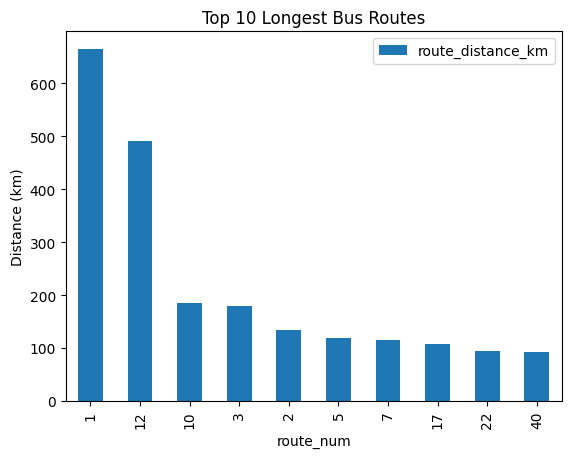

In [50]:
clean_routes.sort_values('route_distance_km', ascending=False).head(10).plot(
    x='route_num', y='route_distance_km', kind='bar'
)
plt.title('Top 10 Longest Bus Routes')
plt.ylabel('Distance (km)')
plt.show()

In [51]:
mr.Markdown("""
**Calculate distance from city centre** using coordinate geometry:

```python
# Approximate conversion: ~111 km per degree latitude, ~85 km per degree longitude at this latitude
# Euclidean distance
merged_stops_clean['distance_from_centre_km'] = np.sqrt(
    ((merged_stops_clean['lat'].astype(float) - city_centre_lat) * 111)**2 + 
    ((merged_stops_clean['lon'].astype(float) - city_centre_lon) * 85)**2
)
```
""")


**Calculate distance from city centre** using coordinate geometry:

```python
# Approximate conversion: ~111 km per degree latitude, ~85 km per degree longitude at this latitude
# Euclidean distance
merged_stops_clean['distance_from_centre_km'] = np.sqrt(
    ((merged_stops_clean['lat'].astype(float) - city_centre_lat) * 111)**2 + 
    ((merged_stops_clean['lon'].astype(float) - city_centre_lon) * 85)**2
)
```


In [52]:
# Approximate conversion: ~111 km per degree latitude, ~85 km per degree longitude at this latitude
# Euclidean distance
merged_stops_clean['distance_from_centre_km'] = np.sqrt(
    ((merged_stops_clean['lat'].astype(float) - city_centre_lat) * 111)**2 + 
    ((merged_stops_clean['lon'].astype(float) - city_centre_lon) * 85)**2
)

mr.Markdown("**Calculated distance from city centre for all stops**")
print("\nDistance statistics (km):")
print(merged_stops_clean['distance_from_centre_km'].describe())

**Calculated distance from city centre for all stops**


Distance statistics (km):
count    1000.000000
mean        3.775980
std         1.791905
min         0.098964
25%         2.319224
50%         3.785285
75%         5.068146
max         8.381130
Name: distance_from_centre_km, dtype: float64


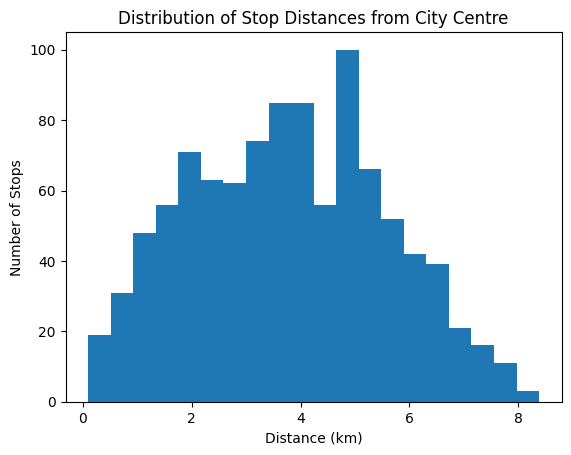

In [53]:
plt.hist(merged_stops_clean['distance_from_centre_km'], bins=20)
plt.title('Distribution of Stop Distances from City Centre')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Stops')
plt.show()

  ## Transformation 6: Aggregation

In [54]:
mr.Markdown("""
**Aggregate stops by region** to understand service distribution:

```python
region_summary = clean_stops.groupby('region').agg({
    'stop_id': 'count',
    'distance_from_centre_km': ['mean', 'max']
}).reset_index()
```
""")


**Aggregate stops by region** to understand service distribution:

```python
region_summary = clean_stops.groupby('region').agg({
    'stop_id': 'count',
    'distance_from_centre_km': ['mean', 'max']
}).reset_index()
```


In [55]:
summary = merged_stops_clean.groupby('region').agg({
    'stop_id': 'count',
    'distance_from_centre_km': ['mean', 'min', 'max']
})
mr.Markdown("**Regional Summary Statistics:**")
print(summary)

**Regional Summary Statistics:**

       stop_id distance_from_centre_km                    
         count                    mean       min       max
region                                                    
NE         224                4.113674  0.132092  7.650399
NW         333                3.994900  0.306790  8.381130
SE         264                3.926796  0.286489  7.536191
SW        1403                2.723696  0.098964  5.336768


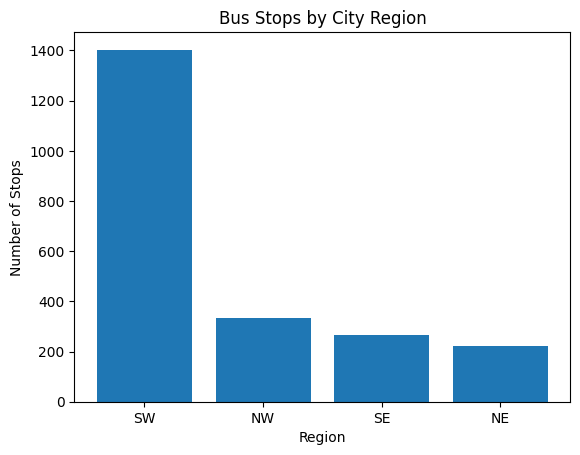

In [56]:
region_counts = merged_stops_clean['region'].value_counts()
plt.bar(region_counts.index, region_counts.values)
plt.title('Bus Stops by City Region')
plt.xlabel('Region')
plt.ylabel('Number of Stops')
plt.show()

  ## Transformation 7: Reshape (Pivot)

In [57]:
mr.Markdown("""
**Pivot analysis:** How many stops does each route serve in each region?

```python
# Join stop times → trips → stops to get route-region relationships
route_stops = (
    times_gtfs_clean
    .merge(trips_gtfs_clean[['trip_id', 'route_id']], on='trip_id')
    .merge(merged_stops_clean[['stop_id', 'region']], left_on='stop_id', right_on='stop_id')
    .groupby(['route_id', 'region'])
    .size()
    .reset_index(name='stop_count')
)

# Pivot to wide format
route_region_pivot = route_stops.pivot(
    index='route_id', 
    columns='region', 
    values='stop_count'
).fillna(0)
```
""")


**Pivot analysis:** How many stops does each route serve in each region?

```python
# Join stop times → trips → stops to get route-region relationships
route_stops = (
    times_gtfs_clean
    .merge(trips_gtfs_clean[['trip_id', 'route_id']], on='trip_id')
    .merge(merged_stops_clean[['stop_id', 'region']], left_on='stop_id', right_on='stop_id')
    .groupby(['route_id', 'region'])
    .size()
    .reset_index(name='stop_count')
)

# Pivot to wide format
route_region_pivot = route_stops.pivot(
    index='route_id', 
    columns='region', 
    values='stop_count'
).fillna(0)
```


In [58]:
# Ensure join keys have the same dtype to avoid merge mismatches
# Cast stop_id/trip_id/route_id to string on both sides of joins
times_gtfs_clean['trip_id'] = times_gtfs_clean['trip_id'].astype(str)
trips_gtfs_clean['trip_id'] = trips_gtfs_clean['trip_id'].astype(str)
times_gtfs_clean['stop_id'] = times_gtfs_clean['stop_id'].astype(str)
merged_stops_clean['stop_id'] = merged_stops_clean['stop_id'].astype(str)
trips_gtfs_clean['route_id'] = trips_gtfs_clean['route_id'].astype(str)

route_stops = (
    times_gtfs_clean
    .merge(trips_gtfs_clean[['trip_id', 'route_id']], on='trip_id')
    .merge(merged_stops_clean[['stop_id', 'region']], left_on='stop_id', right_on='stop_id')
    .groupby(['route_id', 'region'])
    .size()
    .reset_index(name='stop_count')
)

route_region_pivot = route_stops.pivot(
    index='route_id', 
    columns='region', 
    values='stop_count'
).fillna(0)

mr.Markdown("**Routes by Region (Pivoted):**")
route_region_pivot.head(10)

**Routes by Region (Pivoted):**

region       NE      NW      SE       SW
route_id                                
1-44        0.0     0.0     0.0  11105.0
1-45        0.0     0.0     0.0  10997.0
10-44     222.0  1966.0     0.0   6468.0
10-45     210.0  1862.0     0.0   6124.0
12-44       0.0  1400.0  1536.0   8978.0
12-45       0.0  1400.0  1536.0   8978.0
15-44      28.0     0.0   316.0    766.0
15-45      28.0     0.0   316.0    766.0
16-44       0.0    56.0     0.0    388.0
16-45       0.0    56.0     0.0    388.0

  ## Profiling: Outliers & Cardinalities

In [59]:
mr.Markdown("""
**Outlier Detection:** Identify stops unusually far from city centre

**Cardinality Analysis:** Count unique values in key dimensions
""")


**Outlier Detection:** Identify stops unusually far from city centre

**Cardinality Analysis:** Count unique values in key dimensions


In [60]:
print("=== OUTLIERS ===")
print("Stops beyond 15km from city centre:")
outliers = merged_stops_clean[merged_stops_clean['distance_from_centre_km'] > 15]
print(f"Found {len(outliers)} outlier stops")
if len(outliers) > 0:
    print(outliers[['stop_name', 'distance_from_centre_km']].head())

print("\n=== CARDINALITIES ===")
print(f"Unique stops: {merged_stops_clean['stop_id'].nunique()}")
print(f"Unique routes: {routes_gtfs_clean['route_id'].nunique()}")
print(f"Unique regions: {merged_stops_clean['region'].nunique()}")
print(f"Unique trips: {trips_gtfs_clean['trip_id'].nunique()}")

=== OUTLIERS ===
Stops beyond 15km from city centre:
Found 0 outlier stops

=== CARDINALITIES ===
Unique stops: 2224
Unique routes: 44
Unique regions: 4
Unique trips: 5078


  ## Before/After Evidence

In [61]:
mr.Markdown("""
### Quantitative comparison of data quality improvements:
""")


### Quantitative comparison of data quality improvements:


In [62]:
print("=" * 60)
print("BEFORE (Raw Data)")
print("=" * 60)
print(f"Stop rows: {len(df_stops)}")
print(f"Route rows: {len(df_routes)}")
print(f"Missing ATSTREET: {df_stops['attributes.ATSTREET'].isnull().sum()}")
print(f"Coordinate type: {df_stops['attributes.LAT'].dtype} (string)")
print(f"Stop ID type: {df_stops['attributes.STOP_ID'].dtype} (string)")
print(f"Features: 8 columns")

print("\n" + "=" * 60)
print("AFTER (Cleaned & Transformed)")
print("=" * 60)
print(f"Stop rows: {len(merged_stops_clean)} (+{len(missing_stops)} from GTFS)")
print(f"Route rows: {len(clean_routes)}")
print(f"Missing ATSTREET: {merged_stops_clean['at_street'].isnull().sum()}")
print(f"Coordinate type: {merged_stops_clean['lat'].dtype} (numeric-ready)")
print(f"Stop ID type: {merged_stops_clean['stop_id'].dtype} (int32)")
print(f"Features: {len(merged_stops_clean.columns)} columns")
print(f"New derived features: region, route_distance_km, distance_from_centre_km")
print(f"Parsed time features: arrival_hour, arrival_minute, departure_hour, departure_minute")

BEFORE (Raw Data)
Stop rows: 1000
Route rows: 22
Missing ATSTREET: 1
Coordinate type: object (string)
Stop ID type: object (string)
Features: 8 columns

AFTER (Cleaned & Transformed)
Stop rows: 2224 (+1224 from GTFS)
Route rows: 22
Missing ATSTREET: 0
Coordinate type: object (numeric-ready)
Stop ID type: object (int32)
Features: 20 columns
New derived features: region, route_distance_km, distance_from_centre_km
Parsed time features: arrival_hour, arrival_minute, departure_hour, departure_minute


  ## Visualization: Interactive Map

In [63]:
mr.Markdown("""
**Interactive map** showing all bus stops with hover information:
""")


**Interactive map** showing all bus stops with hover information:


In [64]:
#Adapted from the Plotly documentation https://plotly.com/python/tile-scatter-maps/#multiple-markers
stop_fig = go.Figure(go.Scattermap(
    lat=clean_stops['lat'],
    lon=clean_stops['lon'],
    mode='markers',
    marker=go.scattermap.Marker(size=9, color='blue'),
    text=clean_stops['stop_name'],
    hovertemplate='<b>%{text}</b><extra></extra>'
))

stop_fig.update_layout(
    title="Regina Transit Stops",
    autosize=True,
    hovermode='closest',
    map=dict(
        bearing=0,
        center=dict(lat=50.447992743219615, lon=-104.61228441057489),
        pitch=0,
        zoom=11
    ),
    height=600
)

stop_fig.show()

  ## Visualization: Route Overlay

In [65]:
mr.Markdown("""
**Adding route geometry** with coordinate transformation from UTM to lat/lon:

```python
# Transform UTM coordinates to lat/lon
transformer = Transformer.from_crs("EPSG:26913", "EPSG:4326", always_xy=True)

for coordinate in path:
    lon, lat = transformer.transform(coordinate[0], coordinate[1])
```
""")


**Adding route geometry** with coordinate transformation from UTM to lat/lon:

```python
# Transform UTM coordinates to lat/lon
transformer = Transformer.from_crs("EPSG:26913", "EPSG:4326", always_xy=True)

for coordinate in path:
    lon, lat = transformer.transform(coordinate[0], coordinate[1])
```


In [66]:
transformer = Transformer.from_crs("EPSG:26913", "EPSG:4326", always_xy=True)

route_idx = 0
route_name = clean_routes['route_name'].iloc[route_idx]
route_geometry = clean_routes['geometry_paths'].iloc[route_idx]
route_colour = clean_routes['route_color'].iloc[route_idx]

# Transform coordinates
all_lons = []
all_lats = []

for path in route_geometry:
    for coordinate in path:
        lon, lat = transformer.transform(coordinate[0], coordinate[1])
        all_lons.append(lon)
        all_lats.append(lat)
    all_lons.append(None)
    all_lats.append(None)

# Add route to map
stop_fig.add_trace(go.Scattermap(
    lon=all_lons,
    lat=all_lats,
    mode='lines',
    line=dict(width=3, color=route_colour),
    name=route_name,
    hovertemplate=f'<b>{route_name}</b><extra></extra>'
))

stop_fig.show()

  ## Summary of Transformations

In [67]:
mr.Markdown("""
### Completed Transformations (8 operations across 5 categories):

**1. Type Fixes & Parsing**
- Converted stop_id from string to int32
- Parsed arrival/departure times to datetime
- Derived hour and minute features

**2. Text Cleanup**
- Stripped whitespace from all text columns
- Converted to uppercase for consistency
- Fixed malformed addresses

**3. Missing Data Handling**
- Imputed missing ATSTREET values
- Generated street names from stop names for GTFS stops

**4. Join/Merge**
- Merged geographic stops with GTFS schedule data
- Joined stop times → trips → routes → stops

**5. Feature Derivation**
- Created regional classifications (NE, NW, SE, SW)
- Calculated distance from city centre
- Calculate total distance of each route

**6. Aggregation**
- Summarized stops by region with statistics

**7. Reshape**
- Pivoted route-region stop counts to wide format

**8. Coordinate Transformation**
- Converted UTM to lat/lon for visualization
""")


### Completed Transformations (8 operations across 5 categories):

**1. Type Fixes & Parsing**
- Converted stop_id from string to int32
- Parsed arrival/departure times to datetime
- Derived hour and minute features

**2. Text Cleanup**
- Stripped whitespace from all text columns
- Converted to uppercase for consistency
- Fixed malformed addresses

**3. Missing Data Handling**
- Imputed missing ATSTREET values
- Generated street names from stop names for GTFS stops

**4. Join/Merge**
- Merged geographic stops with GTFS schedule data
- Joined stop times → trips → routes → stops

**5. Feature Derivation**
- Created regional classifications (NE, NW, SE, SW)
- Calculated distance from city centre
- Calculate total distance of each route

**6. Aggregation**
- Summarized stops by region with statistics

**7. Reshape**
- Pivoted route-region stop counts to wide format

**8. Coordinate Transformation**
- Converted UTM to lat/lon for visualization


  ## Reproducibility

In [68]:
mr.Markdown("""
### How to reproduce this analysis:

**1. Install dependencies:**
```bash
pip install pandas plotly pyproj numpy jupyter
```

**2. Directory structure:**
```
project/
├── presentation.ipynb
├── transit_data.ipynb
├── raw_data/
│   ├── yqrStops.json
│   ├── yqrRoutes.json
│   └── gtfs_data/
│       ├── stops.txt
│       ├── routes.txt
│       ├── trips.txt
│       └── stop_times.txt
└── README.md
```

**3. Run notebook:**
- Command line: jupyter notebook transit_data.ipynb
- In VS Code: Execute all cells sequentially
- Or run with Mercury: `mercury run presentation.ipynb`

## Tool Versions

- Python: 3.14.0
- pandas: 2.3.3
- numpy: 2.3.5
- plotly: 6.5.0
- pyproj: 3.7.2
""")


### How to reproduce this analysis:

**1. Install dependencies:**
```bash
pip install pandas plotly pyproj numpy jupyter
```

**2. Directory structure:**
```
project/
├── presentation.ipynb
├── transit_data.ipynb
├── raw_data/
│   ├── yqrStops.json
│   ├── yqrRoutes.json
│   └── gtfs_data/
│       ├── stops.txt
│       ├── routes.txt
│       ├── trips.txt
│       └── stop_times.txt
└── README.md
```

**3. Run notebook:**
- Command line: jupyter notebook transit_data.ipynb
- In VS Code: Execute all cells sequentially
- Or run with Mercury: `mercury run presentation.ipynb`

## Tool Versions

- Python: 3.14.0
- pandas: 2.3.3
- numpy: 2.3.5
- plotly: 6.5.0
- pyproj: 3.7.2
